# Comparison of Classifiers for Student Performance Predictions

## Om datasettet

Datasettet Predict Students' Dropout and Academic Succes er en del av et prosjekt på en portugisisk høyskole for å redusere frafall og mislykke i studier på et høyere utdanningsnivå. Informasjonen ble hentet fra flere ulike databaser relatert til bachelorgrad-studier, som f.eks. jordbruk, design, utdanningsvitenskap, sykepleie, journalistikk, ledelse, sosialt arbeid og teknologi. Den beskriver studenter, og blant annet deres studieprogram, demografi, sosioøkonomiske forhold, og studieprogresjon gjennom det første året.

Målet med datasettet er å kunne forutsi hvilke studenter som vil droppe ut, fortsette eller fullføre studiet ved hjelp av maskinlæring.

Datasettet inneholder 4424 observasjoner, altså antall studenter, med 36 features som er diverse informasjon om studentene, samt en målkolonne som forteller hvorvidt studenten dropper ut, fortsetter eller fullfører studiet. Variablene i datasettet er numeriske (heltall eller flyttall) eller kategoriske.

### Datasettet inneholder:
- **Marital status:** Heltall (Kategorisk), Sivilstatus til studenten
- **Application mode:** Heltall (Kategorisk), Opptaksordningen som gjaldt for studenten
- **Application order:** Heltall (Kategorisk), Hvilken prioritet studenten ga studiet ved søknad
- **Couse:** Heltall (Kategorisk), Studieprogrammet
- **Daytime/evening attendance:** Heltall (binær), Om det holdes forelesning på dagtid er kveld
- **Previous qualification:** Heltall (Kategorisk), Høyeste fullførte utdanning ved opptak
- **Previous qualification (grade):** Flyttall, Poengsum fra forrige utdanning
- **Nationality:** Heltall (Kategorisk), Nasjonaliteten til studenten
- **Mother's qualification:** Heltall (Kategorisk), Utdanningsnivå studentens mor
- **Father's qualification:** Heltall (Kategorisk), Utdanningsnivå til studentens far
- **Mothes's occupation:** Heltall (Kategorisk), Yrke til studentens mor
- **Father's occupation:** Heltall (Kategorisk), Yrke til studentens far
- **Admission grade:** Flyttall, Opptakskarakter
- **Displaced:** Heltall (binær), Om studenten har flyttet hjemmefra
- **Educational special needs:** Heltall (binær), Om studenten har spesielle læringsbehov
- **Debtor:** Heltall (binær), Om studenten har gjeld til universitet
- **Tuition fees up to date:** Heltall (binær), Om gjeld blir betalt i tide
- **Gender:** Heltall (binær), Kjønnet til studenten
- **Scholarhip holder:** Heltall (binær), Om studenten mottar stipend
- **Age at enrollment:** Heltall (binær), Alderen til studenten ved opptak
- **International:** Heltall (binær), Om studenten er internasjonal
- **Curricular units 1st sem (credited):** Heltall, Antall emner første semester som studenten har fått studiepoeng for
- **Curricular units 1st sem (enrolled):** Heltall, Antall emner første semester som studenten er påmeldt
- **Curricular units 1st sem (evaluations):** Heltall, Antall emner første semester som studenten har fått vurdering for
- **Curricular units 1st sem (approved):** Heltall, Antall emner første semester som studenten har bestått
- **Curricular units 1st sem (grade):** Flyttall, Gjennomsnittskarakter første semester
- **Curricular units 1st sem (without evaluations):** Heltall, Antall emner første semester uten vurdering
- **Curricular units 2nd sem (credited):** Heltall, Antall emner andre semester som studenten har fått studiepoeng for
- **Curricular units 2nd sem (enrolled):** Heltall, Antall emner andre semester som studenten er påmeldt
- **Curricular units 2nd sem (evaluations):** Heltall, Antall emner andre semester som studenten har fått vurdering for
- **Curricular units 2nd sem (approved):** Heltall, Antall emner andre semester som studenten har bestått
- **Curricular units 2nd sem (grade):** Flyttall, Gjennomsnittskarakter andre semester
- **Curricular units 2nd sem (without evaluations):** Heltall, Antall emner andre semester uten vurdering
- **Unemployment rate:** Flyttall, Arbeidsledigheten i regionen til skolen
- **Inflation rate:** Flyttall, Inflasjonsraten i regionen til skolen
- **GDP:** Flyttall, Bruttonasjonalprodukt i regionen til skolen
- **Target:** Kategorisk, Utfallet for studenten

Klarte ikke å finne en god kilde på hvor arbeidsledigheten, inflasjonsraten og bruttonasjonalprodukt gjaldt, men jeg antar at det gjelder regionen der skolen befinner seg, og ikke hvor studenten er fra. Dette er fordi nasjonaliteten til en student ikke nødvendigvis samsvarer med disse verdiene, f.eks. student nr 1 og 2 er fra Portugal, men har ulike verdier for disse.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, get_scorer
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier

## Preprossessering

In [144]:
dataset = pd.read_csv("data.csv", delimiter=";")
dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Manglende verdier og duplikater

In [146]:
missing_values = int(dataset.isna().sum().sum())
duplicate_values = int(dataset.isna().sum().sum())
print(f"Antall manglende verdier i datasettet: {missing_values}")
print(f"Antall duplikat-rader: {duplicate_values}")

Antall manglende verdier i datasettet: 0
Antall duplikat-rader: 0


Jeg sjekket at dataen var som forventet for datasettet. Det stemte overens med hva jeg forventet, altså antall rader og kolonner er korrekt, det er ingen manglende verdier slik som dokumentasjonen beskrev, og heller ingen duplikat-rader.

### Klassefordeling

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
     

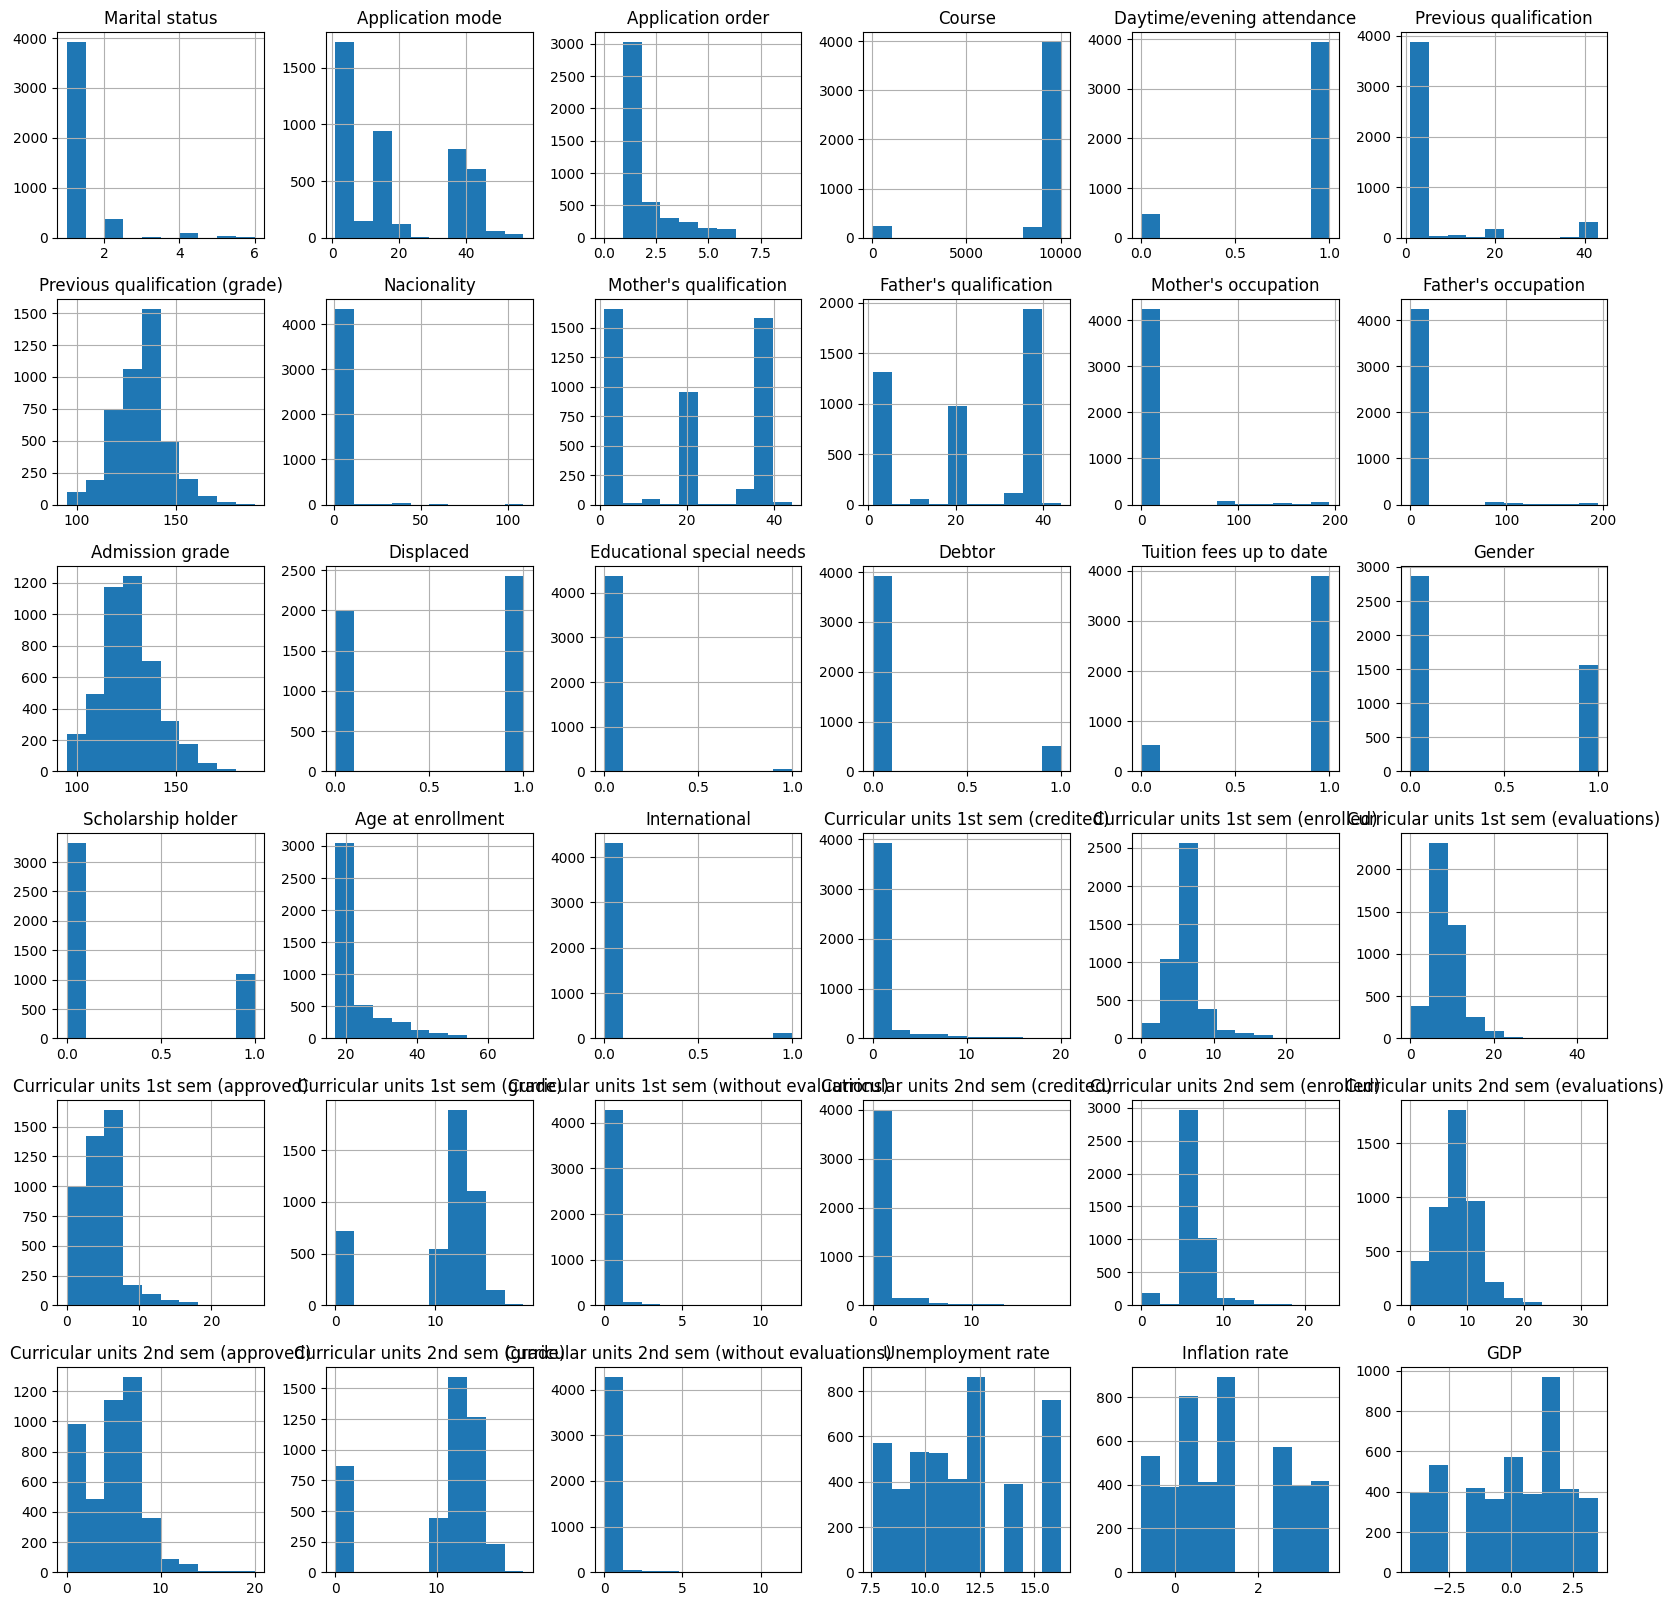

In [147]:
dataset_features = dataset.drop("Target", axis=1)
dataset_targets = dataset["Target"]

encoder = LabelEncoder()
targets_encoded = pd.Series(encoder.fit_transform(dataset_targets))
dataset_features.hist(figsize=(20,20))

<Axes: xlabel='Target'>

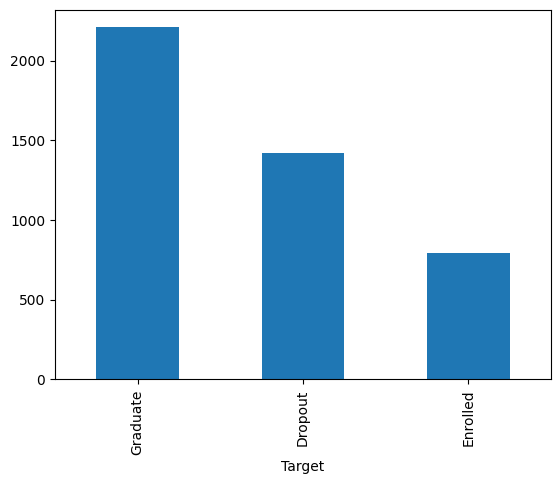

In [148]:
dataset["Target"].value_counts().plot.bar()

Datasettet er tydelig ubalansert. Antall studenter som fullfører er fler enn de som dropper ut, og klart fler enn de som fremdeles ikke er ferdige med studiet.

In [150]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [151]:
encoder.classes_

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

- Klasse 0 = Dropout
- Klasse 1 = Enrolled
- Klasse 2 = Graduate

### Korrelasjon

In [152]:
non_categorical_features = dataset_features.drop(columns=["Marital status", "Application mode", "Course", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"])
non_categorical_features_correlation = non_categorical_features.corr()
non_categorical_features_correlation.style.background_gradient(cmap="coolwarm") 

,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Application order,1.000000,0.158657,-0.064484,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Daytime/evening attendance,0.158657,1.000000,0.052597,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification (grade),-0.064484,0.052597,1.000000,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Admission grade,-0.096930,0.007970,0.580444,1.000000,-0.000543,-0.018306,-0.014423,0.054132,0.008315,0.018881,-0.029915,0.025274,0.040829,-0.033251,-0.072059,0.070892,0.073868,0.009033,0.040225,-0.041878,-0.057132,0.076659,0.074402,-0.013254,0.038756,-0.021624,-0.019519
Displaced,0.332362,0.251767,-0.011001,-0.000543,1.000000,0.004395,-0.089901,0.096027,-0.125815,0.072887,-0.362032,-0.009687,-0.097268,-0.063812,-0.077665,0.047682,0.064815,-0.021671,-0.091738,-0.041823,-0.038839,0.063698,0.069087,-0.035959,-0.130327,-0.012385,0.062875
Educational special needs,0.025597,0.031017,-0.001458,-0.018306,0.004395,1.000000,0.001343,0.013630,-0.017461,0.021223,-0.036987,-0.003646,-0.024411,-0.034837,-0.025972,-0.019873,-0.012284,-0.012324,-0.021671,-0.028777,-0.010851,-0.016315,-0.012761,-0.007491,0.046131,0.004396,0.012016
Debtor,-0.072151,0.006658,-0.037507,-0.014423,-0.089901,0.001343,1.000000,-0.408454,0.053812,-0.067489,0.098793,0.075423,0.034053,-0.010652,0.036054,-0.106657,-0.104170,0.001812,0.025414,-0.029436,0.024201,-0.146977,-0.139424,0.048552,0.021128,-0.021888,0.075050
Tuition fees up to date,0.055891,0.038799,0.060578,0.054132,0.096027,0.013630,-0.408454,1.000000,-0.104098,0.137421,-0.178099,-0.044202,0.003803,0.058721,0.027514,0.239347,0.250394,-0.049775,0.014204,0.085918,0.063482,0.291921,0.296480,-0.071817,0.013460,-0.000706,-0.002768
Gender,-0.089559,-0.012326,-0.047874,0.008315,-0.125815,-0.017461,0.053812,-0.104098,1.000000,-0.169302,0.148835,-0.026415,0.017099,-0.095253,-0.021334,-0.183829,-0.189448,-0.006302,0.018737,-0.124227,-0.041789,-0.224266,-0.199133,0.057223,0.022195,0.003556,-0.008108
Scholarship holder,0.073709,0.093912,0.055965,0.018881,0.072887,0.021223,-0.067489,0.137421,-0.169302,1.000000,-0.189917,-0.027972,-0.088718,-0.004927,-0.063429,0.153772,0.168324,-0.057770,-0.076480,0.026416,-0.021410,0.202704,0.181227,-0.048723,0.055152,-0.031104,0.035650


For å sjekke korrelasjonen måtte jeg utelukke features som representerer kategorier, med unntak av når de er binære verdier. Dette er fordi korrelasjonen er den lineære sammenhengen, og vil derfor ikke gi noen meningsfull informasjon for verdiene som representerer en kategori.

Noen features viser seg å på det meste ha en moderat negativ korrelasjon. De høyeste negative korrelasjonene er; "Age at enrollment" og "Daytime/evening attendance" med korrelasjon på ca. -0.462, og "Tuition fees up to date" og "Debtor" med korrelasjon på ca. -0.408. Om studiet er på dagen så vil verdien være 1, og om det er på kvelden vil det være 0, verdien for alder er kontinuerlig stigende. Det viser altså at jo eldre studenten er, jo mer sannsynlig er det at studenten tar kveldsstudie. Dette virker rimelig ettersom det kan tenkes at eldre studenter ofte er i jobb på dagen, og må derfor gå på skolen på kvelden. Om studenten har gjeld, og om den betaler skoleavgift til tiden, vil verdiene være 1, og hvis ikke vil de være 0. En moderat negativ korrelasjon her tyder på at om studenten har gjeld, så er det mindre sannsynlig at den betaler skoleavgift til tide enn om ikke, noe som virker rimelig.

Mange fler features viser seg å ha høy positiv korrelasjon, og enkelte av dem er svært sterkt korrelert. De høyeste positive korrelasjonene er "Curricular units 1st sem (credited)" og "Curricular units 2nd sem (credited)" med korrelasjon på ca. 0.945, "Curricular units 1st sem (enrolled)" og "Curricular units 2nd sem (enrolled)" med korrelasjon på ca. 0.943, samt "Curricular units 1st sem (approved)" og "Curricular units 2nd sem (approved)" med korrelasjon på ca. 0.904. Dette viser at antall emner studenten er påmeldt, har bestått og fått poeng for første semester, veldig ofte stemmer overens med antall emner dette gjelder i andre semester.

### Skalering av data

In [153]:
scaler = StandardScaler()
standardiced_features = pd.DataFrame(scaler.fit_transform(dataset_features), columns=dataset_features.columns)
standardiced_features.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4424.000000,...,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,-9.636656e-18,-1.477621e-16,-1.043971e-16,2.288706e-16,7.066881e-17,-2.087942e-17,-3.589654e-16,2.409164e-17,-5.781993e-17,0.000000,...,9.636656e-18,-3.212219e-18,1.646262e-16,-8.994212e-17,-1.509743e-16,-2.409164e-16,3.212219e-18,-5.460771e-17,1.445498e-16,2.569775e-17
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113,...,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-2.948287e-01,-1.010660e+00,-1.315309e+00,-4.276402e+00,-2.856470e+00,-3.502305e-01,-2.852337e+00,-1.262982e-01,-1.189759e+00,-1.386793,...,-1.992730e-01,-2.824423e-01,-2.838337e+00,-2.042630e+00,-1.471527e+00,-1.963489e+00,-1.994410e-01,-1.489043e+00,-1.466871e+00,-1.789667e+00
25%,-2.948287e-01,-1.010660e+00,-5.540678e-01,1.106740e-01,3.500825e-01,-3.502305e-01,-5.773417e-01,-1.262982e-01,-1.125662e+00,-1.256427,...,-1.992730e-01,-2.824423e-01,-5.611611e-01,-5.226824e-01,-8.080500e-01,9.976438e-02,-1.994410e-01,-8.132529e-01,-6.712423e-01,-7.498721e-01
50%,-2.948287e-01,-9.547022e-02,-5.540678e-01,1.848259e-01,3.500825e-01,-3.502305e-01,3.690696e-02,-1.262982e-01,-3.601818e-02,-0.213496,...,-1.992730e-01,-2.824423e-01,-1.057260e-01,-1.603320e-02,1.871653e-01,3.780636e-01,-1.994410e-01,-1.750068e-01,1.243865e-01,1.401217e-01
75%,-2.948287e-01,1.162916e+00,2.071732e-01,3.389454e-01,3.500825e-01,-3.502305e-01,5.601559e-01,-1.262982e-01,1.117723e+00,0.959802,...,-1.992730e-01,-2.824423e-01,3.497091e-01,4.906160e-01,5.189037e-01,5.955849e-01,-1.994410e-01,8.762221e-01,9.923451e-01,7.877904e-01
max,7.960376e+00,2.192505e+00,5.535860e+00,5.497694e-01,3.500825e-01,3.761194e+00,4.351815e+00,1.549479e+01,1.566400e+00,1.416085,...,1.717184e+01,9.622009e+00,7.636671e+00,6.317081e+00,5.163242e+00,1.600935e+00,1.572225e+01,1.739731e+00,1.787974e+00,1.545607e+00


array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
     

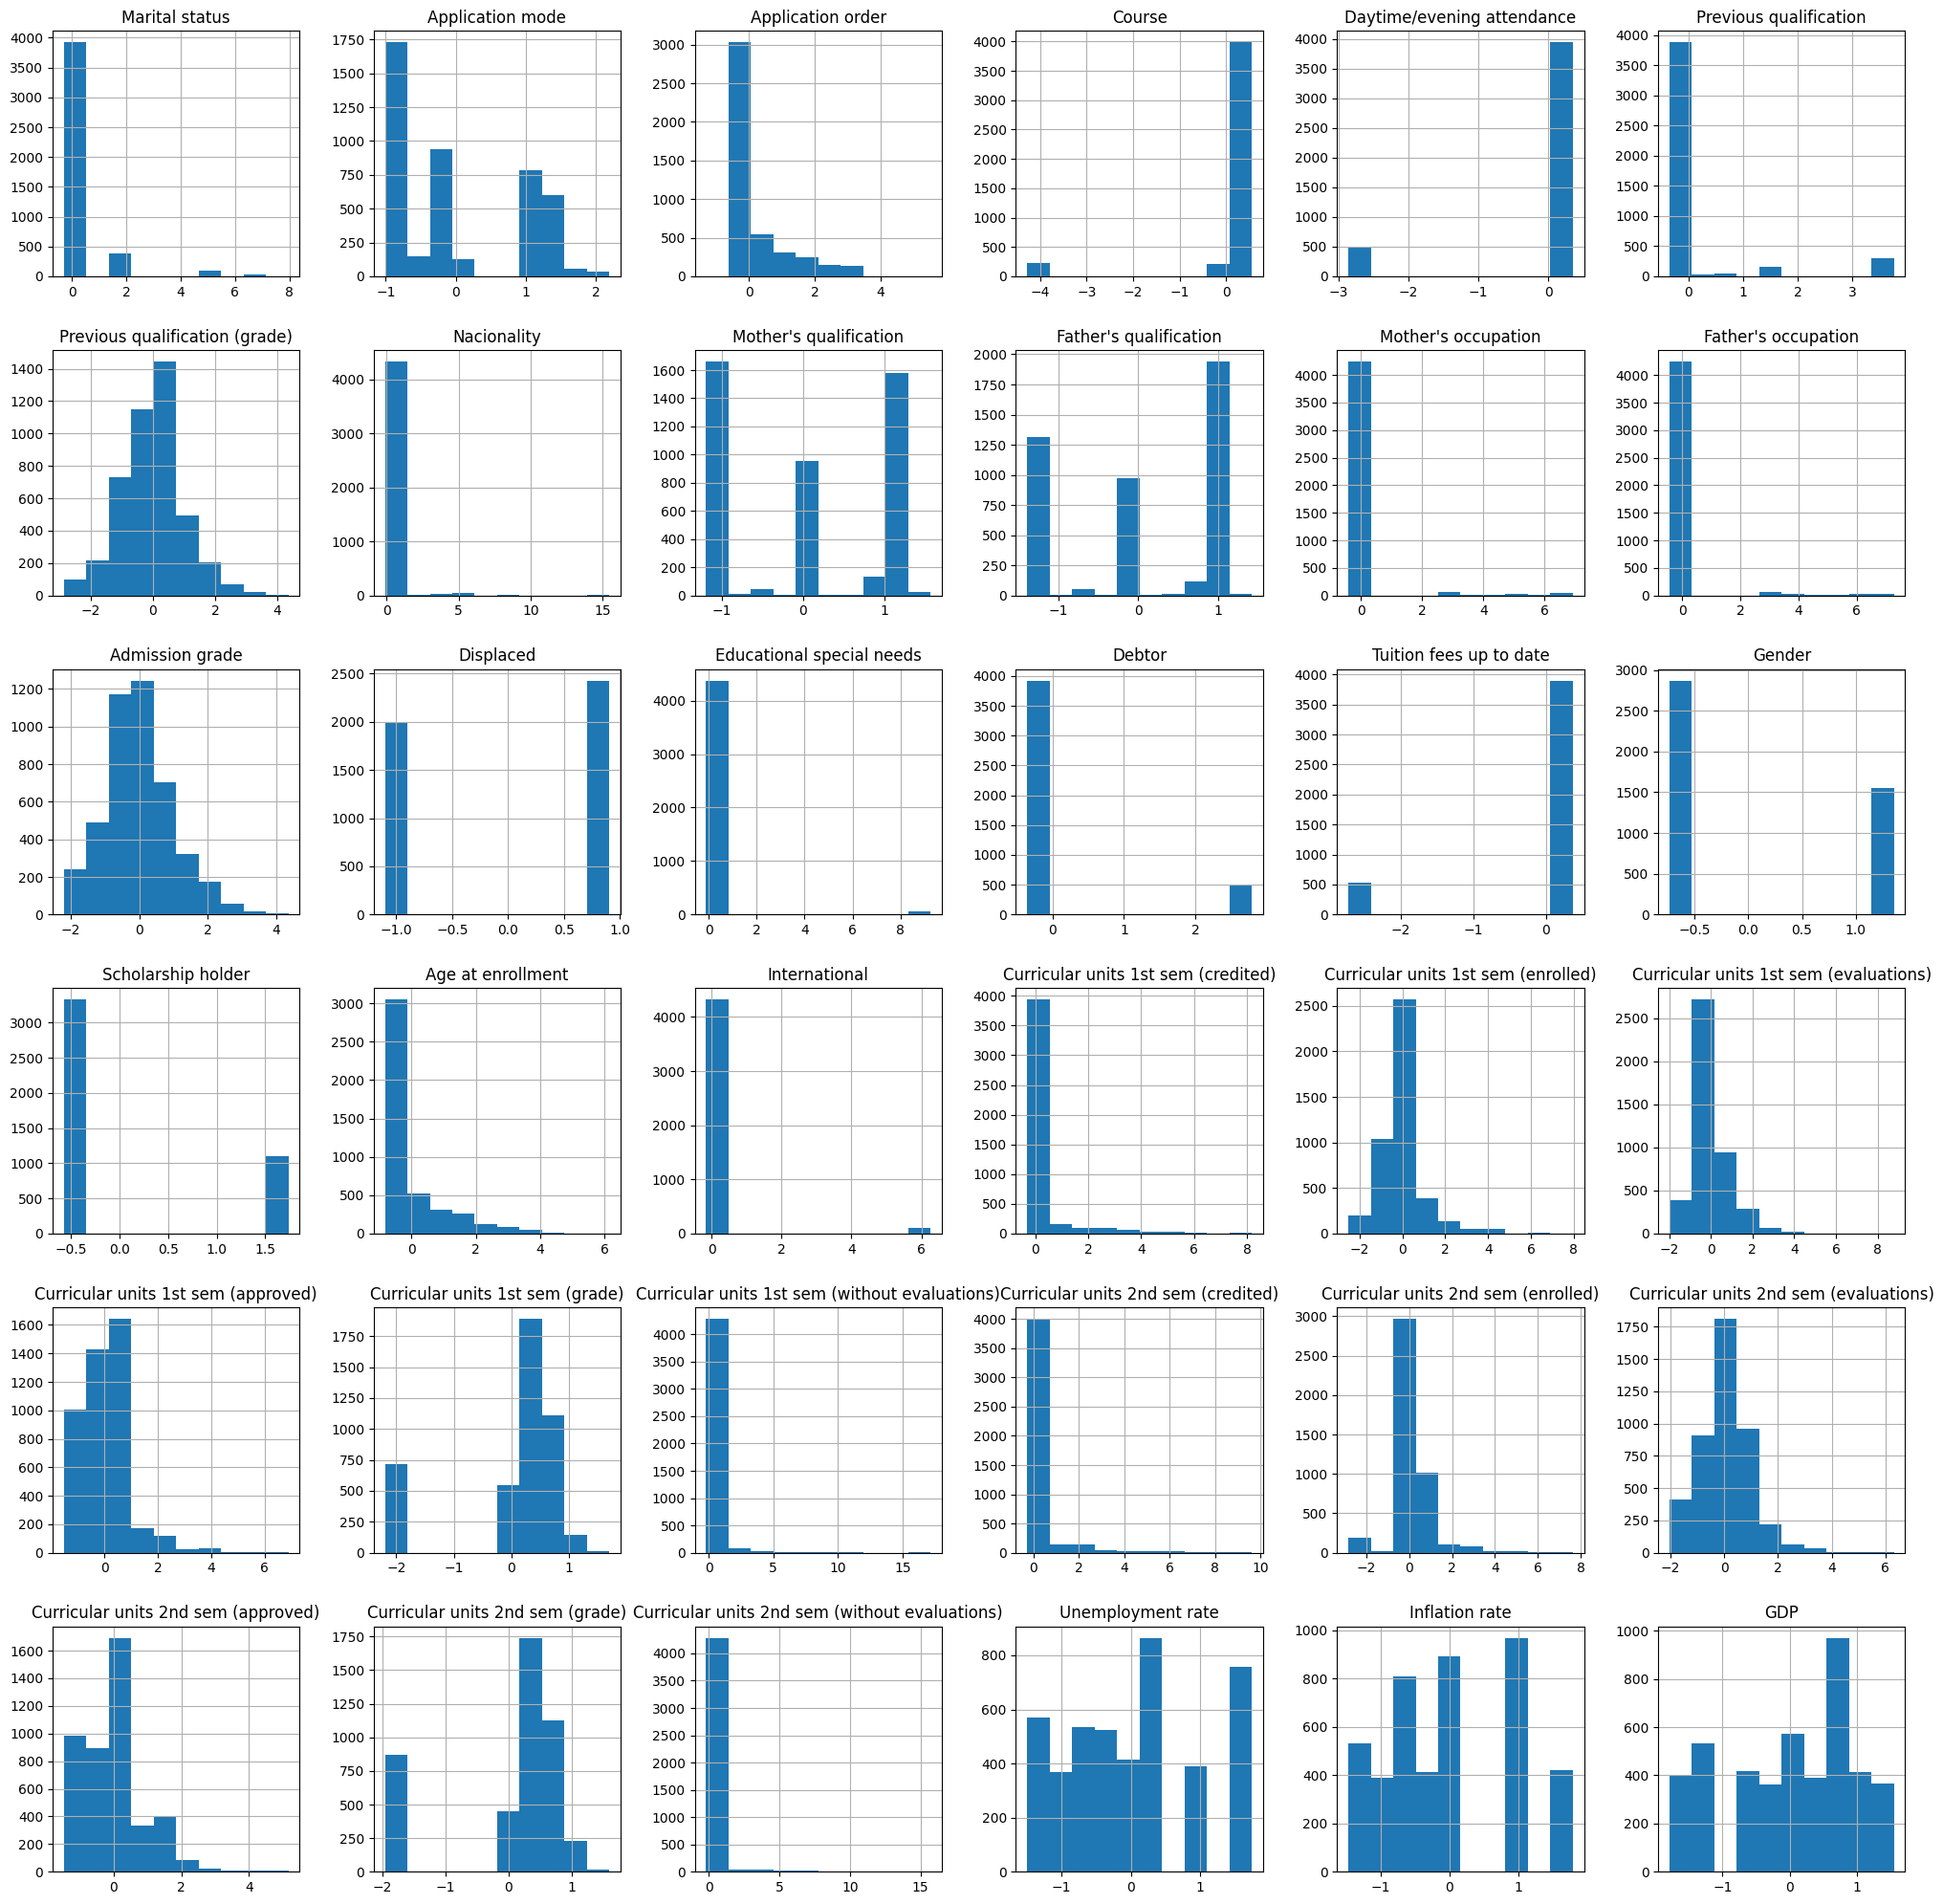

In [154]:
standardiced_features.hist(figsize=(25,25))

Standardisering av dataen sørger for at alle numeriske variabler måles på samme skala, slik at ikke features med høyere tallverdier skal dominere i algoritmene. Dette er spesielt viktig for SVC ettersom denne er avstandsbasert.

Flere features er skjevt fordelt så jeg vil teste om log-transformasjon på disse vil forbedre metrikkene. Dette gjelder ikke de kategoriske eller binære variablene. De jeg skal forsøke log-transformasjon på er alle Curricular units 1st/2nd sem, ettersom disse er høyreskjeve.

### PCA-analyse

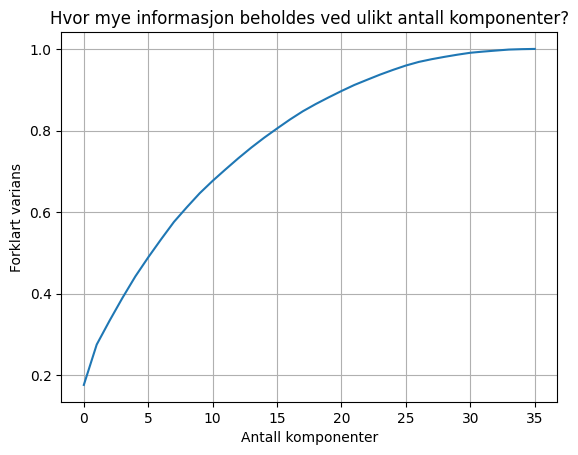

In [155]:
pca = PCA()
pca.fit(standardiced_features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Antall komponenter')
plt.ylabel('Forklart varians')
plt.title('Hvor mye informasjon beholdes ved ulikt antall komponenter?')
plt.grid(True)
plt.show()

Fra PCA-analyse vises det at all informasjon skal bli beholdt ved omtrent 33-35 komponenter, så jeg vil teste disse.

### Funksjon for bygging av tensorflow modell

In [156]:
n_features = dataset_features.shape[1]
n_classes = n_classes = len(set(targets_encoded))

def build_tensorflow_model(hidden_neurons1=64, hidden_neurons2=32, dropout_rate=0.0, n_features=n_features):
    model = Sequential()
    model.add(tf.keras.Input(shape=(n_features,)))
    #model.add(Input(shape=(n_features,)))
    model.add(Dense(hidden_neurons1, activation="relu"))
    model.add(Dense(hidden_neurons2, activation="relu"))

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(n_classes, activation="softmax"))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [183]:
#n_classes = n_classes = len(set(targets_encoded))

def build_tensorflow_model(meta, hidden_neurons1=64, hidden_neurons2=32, dropout_rate=0.0):
    n_features = meta["n_features_in_"]
    n_classes = meta["n_classes_"]

    model = Sequential()
    model.add(tf.keras.Input(shape=(n_features,)))
    #model.add(Input(shape=(n_features,)))
    model.add(Dense(hidden_neurons1, activation="relu"))
    model.add(Dense(hidden_neurons2, activation="relu"))

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(n_classes, activation="softmax"))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

Her laget jeg en funksjon som skal bygge et nevralt nettverk med Tensorflow som vil bli brukt i KerasClassifier. Funksjonen tar imot antall neuroner i første og andre skjulte lag, samt en dropout rate som skal tunes senere. Den kompilerer modellen, og er definert til å evalueres på accuracy under trening ettersom det er vanlig i Keras. Den vil likevel bli tunet for precision senere slik som de andre modellene.

In [157]:
categorical_features = [
    "Marital status", 
    "Application mode", 
    "Course", 
    "Previous qualification", 
    "Nacionality", 
    "Mother's qualification", 
    "Father's qualification", 
    "Mother's occupation", 
    "Father's occupation"
    ]

binary = [
    "Daytime/evening attendance",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International"
]

continious = [
    "Application order",
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

features_to_log = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

In [165]:
scale = ColumnTransformer(
    transformers=[
        ("con", StandardScaler(), continious)
    ],
    remainder="passthrough"
)

encode = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

log = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one'), features_to_log),
    ],
    remainder='passthrough'
)
scale_and_encode = ColumnTransformer(
    transformers=[
        ("con", StandardScaler(), continious),
        ("bin", "passthrough", binary),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)

log_and_scale_pipe = Pipeline([
        ("log", log),
        ("scale", StandardScaler())
])
log_and_scale = ColumnTransformer(
    transformers=[
        ("con", log_and_scale_pipe, continious)
    ],
    remainder="passthrough"
)

log_and_encode = ColumnTransformer(
    transformers=[
        ("con", log, continious),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ],
    remainder="passthrough"
)

log_scale_encode = ColumnTransformer(
    transformers=[
        ("con", log_and_scale_pipe, continious),
        ("bin", "passthrough", binary),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)


Jeg valgte å bruke columntransformers for å kunne teste ulike kombinasjoner av preprossessert data i pipelines i riktig rekkefølge. Jeg tester skalering av kolonner som ikke er binære verdier, log-transformasjon på de som er svært skjeve, og OneHotEncoder på kategoriske features. Jeg får derfor testet følgende kombinasjoner.

- **Kun skalering**
- **Kun encoding**
- **Kun log**
- **Skalering og encoding**
- **Log og skalering**
- **Log og encoding**
- **Log, skalering og encoding**

In [166]:
encoded = encode.fit_transform(dataset_features)
encoded.shape

(4424, 247)

Encoding av dataen vil utvide antall features til 247.

### Metrikker som skal testes

In [15]:
scoring = {
    'accuracy': get_scorer('accuracy'),
    'precision': make_scorer(precision_score, average='macro', zero_division=1.0),
    'recall': make_scorer(recall_score, average='macro', zero_division=1.0),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovr', average='macro', response_method='predict_proba'),
}

In [16]:
tensorflow_scoring = {
    'accuracy': get_scorer('accuracy'),
    'precision': make_scorer(precision_score, average='macro', zero_division=1.0),
    'recall': make_scorer(recall_score, average='macro', zero_division=1.0),
    'f1': make_scorer(f1_score, average='macro')
}

Tensorflow ville ikke fungere da jeg forsøkte å måle ROC_AUC, så jeg valgte å fjerne denne for disse modellene.

In [184]:
global_random_state = 13
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

pipelines = {
    "gb_no_processing": Pipeline([
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_scaled": Pipeline([
        ('scale', scale),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_encoded": Pipeline([
        ('enc', encode),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log": Pipeline([
        ('log', log),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),

    "nb_no_processing": Pipeline([
        ('nb', GaussianNB())
    ]),
    "nb_scaled": Pipeline([
        ('scale', scale),       
        ('nb', GaussianNB())
    ]),
    "nb_encoded": Pipeline([
        ('enc', encode),       
        ('nb', GaussianNB())
    ]),
    "nb_log": Pipeline([
        ('log', log),       
        ('nb', GaussianNB())
    ]),
    "nb_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('nb', GaussianNB())
    ]),
    "nb_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('nb', GaussianNB())
    ]),
    "nb_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('nb', GaussianNB())
    ]),
    "nb_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('nb', GaussianNB())
    ]),

    "svc_no_processing": Pipeline([
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_scaled": Pipeline([
        ('scale', scale),       
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_encoded": Pipeline([
        ('enc', encode),       
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log": Pipeline([
        ('log', log),       
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    
    "mlp_no_processing": Pipeline([
        ('mlp', MLPClassifier(max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_scaled": Pipeline([
        ('scale', scale),       
        ('mlp', MLPClassifier(max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_encoded": Pipeline([
        ('enc', encode),       
        ('mlp', MLPClassifier(max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_log": Pipeline([
        ('log', log),       
        ('mlp', MLPClassifier(max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('mlp', MLPClassifier(max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('mlp', MLPClassifier(max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('mlp', MLPClassifier(max_iter=1000, random_state=global_random_state))
    ]),
    "mlp_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('mlp', MLPClassifier(max_iter=1000, random_state=global_random_state))
    ]),

    "tf_no_processing": Pipeline([
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_scaled": Pipeline([
        ('scale', scale),       
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_encoded": Pipeline([
        ('enc', encode),       
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_log": Pipeline([
        ('log', log),       
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_scaled_encoded": Pipeline([
        ('scale_encode', scale_and_encode),     
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_log_scaled": Pipeline([
        ('log_scaled', log_and_scale),     
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_log_encoded": Pipeline([
        ('log_encoded', log_and_encode),     
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
    "tf_log_scaled_encoded": Pipeline([
        ('log_scaled_encoded', log_scale_encode),     
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),
     
}

### Pipelines for ulike modeller

In [17]:
global_random_state = 13
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

pipelines = {
    "gb_no_pca": Pipeline([
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log": Pipeline([
        ('log', log_transformer),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_scaled": Pipeline([
        ('scaler', scaler),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_log_scaled": Pipeline([
        ('log', log_transformer),
        ('scaler', scaler),       
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_pca35": Pipeline([
        ('scaler', scaler),       
        ('pca', PCA(n_components=35)),
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_pca34": Pipeline([
        ('scaler', scaler),       
        ('pca', PCA(n_components=34)),
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    "gb_pca33": Pipeline([
        ('scaler', scaler),       
        ('pca', PCA(n_components=33)),
        ('gb', GradientBoostingClassifier(random_state=global_random_state))
    ]),
    

    "nb_no_pca": Pipeline([
        ('nb', GaussianNB())
    ]),
    "nb_log": Pipeline([
        ('log', log_transformer),
        ('nb', GaussianNB())
    ]),
    "nb_scaled": Pipeline([
        ('scaler', scaler),
        ('nb', GaussianNB())
    ]),
    "nb_log_scaled": Pipeline([
        ('log', log_transformer),
        ('scaler', scaler),
        ('nb', GaussianNB())
    ]),
    "nb_pca35": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=35)),
        ('nb', GaussianNB())
    ]),
    "nb_pca34": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=34)),
        ('nb', GaussianNB())
    ]),
    "nb_pca33": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=33)),
        ('nb', GaussianNB())
    ]),

    "svc_no_pca": Pipeline([ 
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log": Pipeline([
        ('log', log_transformer),
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_scaled": Pipeline([
        ('scaler', scaler), 
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_log_scaled": Pipeline([
        ('log', log_transformer),
        ('scaler', scaler), 
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_pca35": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=35)),
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_pca34": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=34)),
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),
    "svc_pca33": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=33)),
        ('svc', SVC(probability=True, random_state=global_random_state))
    ]),

    "mlp_no_pca": Pipeline([
        ('mlp', MLPClassifier(max_iter=300, random_state=global_random_state))
    ]),
    "mlp_log": Pipeline([
        ('log', log_transformer),
        ('mlp', MLPClassifier(max_iter=300, random_state=global_random_state))
    ]),
    "mlp_scaled": Pipeline([
        ('scaler', scaler),
        ('mlp', MLPClassifier(max_iter=300, random_state=global_random_state))
    ]),
    "mlp_log_scaled": Pipeline([
        ('log', log_transformer),
        ('scaler', scaler),
        ('mlp', MLPClassifier(max_iter=300, random_state=global_random_state))
    ]),
    "mlp_pca35": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=35)),
        ('mlp', MLPClassifier(max_iter=300, random_state=global_random_state))
    ]),
    "mlp_pca34": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=34)),
        ('mlp', MLPClassifier(max_iter=300, random_state=global_random_state))
    ]),  
    "mlp_pca33": Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=33)),
        ('mlp', MLPClassifier(max_iter=300, random_state=global_random_state))
    ]),

    "tf_no_pca" : Pipeline([
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),  
    "tf_log" : Pipeline([
        ('log', log_transformer),
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]), 
    "tf_scaled" : Pipeline([
        ('scaler', scaler),
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),  
    "tf_log_scaled" : Pipeline([
        ('log', log_transformer),
        ('scaler', scaler),
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, random_state=global_random_state))
    ]),   
    "tf_pca35" : Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=35)),
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, n_features=35, random_state=global_random_state))
    ]),    
    "tf_pca34" : Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=34)),
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, n_features=34, random_state=global_random_state))
    ]),  
    "tf_pca33" : Pipeline([
        ('scaler', scaler),
        ('pca', PCA(n_components=33)),
        ('tf', KerasClassifier(model=build_tensorflow_model, epochs=15, batch_size=32, verbose=0, n_features=33, random_state=global_random_state))
    ]),  
     
}

Jeg valgte å lage pipelines for å sørge for at dataen blir skalert og gjort PCA på for hver fold i kryssvalideringen. Dette gjør jeg for å sørge for at det ikke blir noen datalekasje.

Bruker probability=True på SVC for å kunne måle ROC-AUC. Når jeg gjør dette så gjør modellen en intern logistisk regresjon som er random, og jeg må derfor sette random state.

For tensorflow-modellene så brukte jeg funksjonen jeg lagde for å bygge disse. Jeg satt antall epochs til 15 for å kunne få gode resultater uten at de må kjøre alt for lenge i disse testene. Batch_size satt jeg til 32 ettersom det er en verdi som ofte er brukt. Verbose satt jeg til 0 for å slippe å få skrevet ut alt for mye informasjon.

### AB-tester for Gradient Boosting

In [168]:
print("Gradient boosting:")
for name, pipe in pipelines.items():
    if not name.startswith(("gb")):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

Gradient boosting:
gb_no_processing :
Accuracy:  [0.78305085 0.77062147 0.77062147 0.76610169 0.78054299] Gjennomsnitt: 0.774
Precision: [0.73224682 0.71657852 0.71893026 0.71346154 0.74060923] Gjennomsnitt: 0.724
Recall:    [0.69518225 0.68297394 0.68909861 0.67408503 0.70868416] Gjennomsnitt: 0.690
F1:        [0.70278354 0.6930265  0.69807166 0.68383119 0.72028769] Gjennomsnitt: 0.700
ROC:       [0.90374504 0.8896223  0.89188639 0.88697228 0.89599781] Gjennomsnitt: 0.894
gb_scaled :
Accuracy:  [0.78305085 0.76949153 0.77175141 0.76497175 0.78054299] Gjennomsnitt: 0.774
Precision: [0.73224682 0.71489551 0.72076273 0.71151173 0.74060923] Gjennomsnitt: 0.724
Recall:    [0.69518225 0.68221979 0.69119504 0.67333088 0.70868416] Gjennomsnitt: 0.690
F1:        [0.70278354 0.6920908  0.70025734 0.68288935 0.72028769] Gjennomsnitt: 0.700
ROC:       [0.90366588 0.8894084  0.89181458 0.88615837 0.89590179] Gjennomsnitt: 0.893
gb_encoded :
Accuracy:  [0.77627119 0.7819209  0.77740113 0.75706215 0

For gradient boosting så gir i snitt modellene uten PCA best resultater på alle metrikker, så jeg ønsker å bruke det videre. Om dataen er skalert eller ikke påvirker metrikkene omtrent ingenting, slik som forventet. Log-transformasjon påvirker også omtrent ingenting.

### AB-tester for Gaussian Naive Bayes

In [169]:
print("Gaussian Naive Bayes:")
for name, pipe in pipelines.items():
    if not name.startswith(("nb")):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

Gaussian Naive Bayes:
nb_no_processing :
Accuracy:  [0.70056497 0.69265537 0.68926554 0.68361582 0.65497738] Gjennomsnitt: 0.684
Precision: [0.62360819 0.61794119 0.6314216  0.5886766  0.57603658] Gjennomsnitt: 0.608
Recall:    [0.60955263 0.6009863  0.60769877 0.57758851 0.55787402] Gjennomsnitt: 0.591
F1:        [0.61152663 0.60452784 0.61485636 0.5741943  0.55915814] Gjennomsnitt: 0.593
ROC:       [0.8178973  0.78479922 0.80335775 0.78717027 0.79645406] Gjennomsnitt: 0.798
nb_scaled :
Accuracy:  [0.69943503 0.69265537 0.68926554 0.68022599 0.65497738] Gjennomsnitt: 0.683
Precision: [0.62216437 0.61794119 0.6318085  0.57988453 0.57603658] Gjennomsnitt: 0.606
Recall:    [0.60838304 0.6009863  0.60769877 0.57222193 0.55787402] Gjennomsnitt: 0.589
F1:        [0.61040949 0.60452784 0.61497507 0.56738316 0.55915814] Gjennomsnitt: 0.591
ROC:       [0.81770679 0.78480076 0.80334493 0.78697724 0.79638566] Gjennomsnitt: 0.798
nb_encoded :
Accuracy:  [0.24293785 0.25649718 0.23389831 0.2655367

For Gaussian Naive Bayes gir også gir ingen PCA best metrikker. Skalering gjør heller omtrent ingen forskjell her, slik som foventet. Log-transformasjon gjør også svært liten forskjell, det gir faktisk litt dårligere metrikker.

Her blir metrikkene dårligere enn ved Gradient Boosting. Dette er også forventet ettersom Naive Bayes er mer sensitiv ovenfor svært ubalansert data.

### AB-tester for SVC

In [170]:
print("SVC:")
for name, pipe in pipelines.items():
    if not name.startswith(("svc")):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

SVC:
svc_no_processing :
Accuracy:  [0.49830508 0.49943503 0.49943503 0.49943503 0.5       ] Gjennomsnitt: 0.499
Precision: [0.83276836 0.83314501 0.83314501 0.83314501 0.83333333] Gjennomsnitt: 0.833
Recall:    [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333] Gjennomsnitt: 0.333
F1:        [0.22171946 0.22205476 0.22205476 0.22205476 0.22222222] Gjennomsnitt: 0.222
ROC:       [0.76138507 0.74869129 0.70885393 0.72590935 0.71753152] Gjennomsnitt: 0.732
svc_scaled :
Accuracy:  [0.49830508 0.49943503 0.49943503 0.49943503 0.5       ] Gjennomsnitt: 0.499
Precision: [0.83276836 0.83314501 0.83314501 0.83314501 0.83333333] Gjennomsnitt: 0.833
Recall:    [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333] Gjennomsnitt: 0.333
F1:        [0.22171946 0.22205476 0.22205476 0.22205476 0.22222222] Gjennomsnitt: 0.222
ROC:       [0.65386294 0.61578689 0.55472946 0.61501774 0.57070677] Gjennomsnitt: 0.602
svc_encoded :
Accuracy:  [0.66779661 0.66214689 0.64745763 0.66553672 0.66063348] 

Her gir skalert data og PCA med ulikt antall komponenter omtrent helt like metrikker. Uten skalering blir metrikkene vesentlig dårligere, med unntak av precision som blir veldig høy. Dette er sannsynligvis fordi modellen svært sjelden predikerer en positiv klasse, men at den treffer når den først gjør det. Dette er som forventet ettersom SVC fungerer svært dårlig på data som ikke er skalert siden det er en avstandsbasert modell. SVC med log og skalering gir høyest precision uten at de andre metrikkene stuper, så jeg bruker denne videre.

Ellers gir SVC litt lavere metrikker enn ved Gradient Boosting.

### AB-tester for MLP

In [171]:
print("MLP:")
for name, pipe in pipelines.items():
    if not name.startswith(("mlp")):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")
    print(f"ROC:       {cv_results["test_roc_auc"]} Gjennomsnitt: {np.mean(cv_results["test_roc_auc"]):.3f}")

MLP:
mlp_no_processing :
Accuracy:  [0.33559322 0.52655367 0.65310734 0.68587571 0.47171946] Gjennomsnitt: 0.535
Precision: [0.41688771 0.53156677 0.62726209 0.67463521 0.59531383] Gjennomsnitt: 0.569
Recall:    [0.34240363 0.5225087  0.50092787 0.56299242 0.55844444] Gjennomsnitt: 0.497
F1:        [0.18212331 0.50114943 0.47984198 0.51223469 0.4704207 ] Gjennomsnitt: 0.429
ROC:       [0.75615362 0.74812432 0.82164234 0.81404739 0.80851588] Gjennomsnitt: 0.790
mlp_scaled :
Accuracy:  [0.3740113  0.6079096  0.54576271 0.50282486 0.73076923] Gjennomsnitt: 0.552
Precision: [0.74314748 0.66787601 0.54600186 0.38114285 0.67312457] Gjennomsnitt: 0.602
Recall:    [0.36727533 0.61698624 0.50471508 0.34247596 0.65032731] Gjennomsnitt: 0.496
F1:        [0.23370262 0.58633425 0.46689977 0.25274282 0.65807371] Gjennomsnitt: 0.440
ROC:       [0.77718852 0.81735683 0.80015956 0.75497623 0.84725904] Gjennomsnitt: 0.799
mlp_encoded :
Accuracy:  [0.78757062 0.75819209 0.75819209 0.73559322 0.75      ] 

For MLPClassifier så er det viktig at dataen er skalert, noe som tydelig vises i sammenligningen. Denne fungerer best med skalert data uten PCA og log. Metrikkene er dårligere enn ved Gradient Boosting og SVC, men bedre enn Naive Bayes.

### AB-tester for Keras/Tensorflow

In [185]:
print("Keras/Tensorflow:")
for name, pipe in pipelines.items():
    if not name.startswith("tf"):
        continue
    cv_results = cross_validate(pipe, dataset_features, targets_encoded, cv=cv, scoring=tensorflow_scoring)
    print(name,":")
    print(f"Accuracy:  {cv_results["test_accuracy"]} Gjennomsnitt: {np.mean(cv_results["test_accuracy"]):.3f}")
    print(f"Precision: {cv_results["test_precision"]} Gjennomsnitt: {np.mean(cv_results["test_precision"]):.3f}")
    print(f"Recall:    {cv_results["test_recall"]} Gjennomsnitt: {np.mean(cv_results["test_recall"]):.3f}")
    print(f"F1:        {cv_results["test_f1"]} Gjennomsnitt: {np.mean(cv_results["test_f1"]):.3f}")

Keras/Tensorflow:


2025-12-07 16:29:24.137271: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-12-07 16:29:29.938027: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

tf_no_processing :
Accuracy:  [0.35141243 0.70056497 0.6259887  0.67683616 0.55090498] Gjennomsnitt: 0.581
Precision: [0.38782943 0.46762879 0.68542923 0.56699559 0.59355111] Gjennomsnitt: 0.540
Recall:    [0.35174444 0.5737206  0.63509367 0.52524134 0.48032567] Gjennomsnitt: 0.513
F1:        [0.2074308  0.50943471 0.60532432 0.49113549 0.4130959 ] Gjennomsnitt: 0.445


2025-12-07 16:29:35.577845: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_scaled :
Accuracy:  [0.71186441 0.72090395 0.64519774 0.70508475 0.33484163] Gjennomsnitt: 0.624
Precision: [0.67112188 0.73974684 0.45119048 0.59305225 0.58963135] Gjennomsnitt: 0.609
Recall:    [0.56079072 0.58679056 0.54012385 0.55424811 0.34341598] Gjennomsnitt: 0.517
F1:        [0.52624466 0.53596869 0.47282817 0.5200133  0.19131482] Gjennomsnitt: 0.449


2025-12-07 16:29:41.598712: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_encoded :
Accuracy:  [0.74011299 0.75367232 0.76836158 0.72090395 0.75791855] Gjennomsnitt: 0.748
Precision: [0.69985986 0.71562337 0.72482228 0.67964531 0.70694797] Gjennomsnitt: 0.705
Recall:    [0.71947028 0.70781836 0.70881303 0.69408848 0.63118078] Gjennomsnitt: 0.692
F1:        [0.70257074 0.70652338 0.71336094 0.68088769 0.62051103] Gjennomsnitt: 0.685


2025-12-07 16:29:47.264996: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_log :
Accuracy:  [0.6700565  0.66440678 0.63050847 0.52542373 0.39366516] Gjennomsnitt: 0.577
Precision: [0.47761352 0.47964371 0.65578654 0.52760701 0.52703587] Gjennomsnitt: 0.534
Recall:    [0.51814457 0.51014913 0.4725041  0.3677956  0.49837177] Gjennomsnitt: 0.473
F1:        [0.48134718 0.47439171 0.43964081 0.29952724 0.38787784] Gjennomsnitt: 0.417


2025-12-07 16:29:53.340393: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_scaled_encoded :
Accuracy:  [0.79096045 0.74011299 0.76610169 0.75480226 0.76357466] Gjennomsnitt: 0.763
Precision: [0.73990946 0.67515469 0.71841415 0.69049554 0.71715296] Gjennomsnitt: 0.708
Recall:    [0.71200913 0.66579969 0.68817828 0.65454656 0.70453722] Gjennomsnitt: 0.685
F1:        [0.72108115 0.66950848 0.69829992 0.66108811 0.70890629] Gjennomsnitt: 0.692


2025-12-07 16:29:59.014127: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_log_scaled :
Accuracy:  [0.66666667 0.72316384 0.65084746 0.63954802 0.33371041] Gjennomsnitt: 0.603
Precision: [0.67052356 0.65506003 0.63012817 0.64952236 0.43689402] Gjennomsnitt: 0.608
Recall:    [0.51142531 0.57344701 0.52978597 0.6150342  0.34088671] Gjennomsnitt: 0.514
F1:        [0.48141052 0.53033653 0.53257892 0.60581342 0.18851832] Gjennomsnitt: 0.468


2025-12-07 16:30:05.094341: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


tf_log_encoded :
Accuracy:  [0.66327684 0.72881356 0.73333333 0.68926554 0.73076923] Gjennomsnitt: 0.709
Precision: [0.67798163 0.68084677 0.67369758 0.63603909 0.66011905] Gjennomsnitt: 0.666
Recall:    [0.68434143 0.5961816  0.66362496 0.64671488 0.63873994] Gjennomsnitt: 0.646
F1:        [0.65137966 0.54087763 0.66553562 0.63476538 0.63669009] Gjennomsnitt: 0.626
tf_log_scaled_encoded :
Accuracy:  [0.78983051 0.74915254 0.7740113  0.75932203 0.77488688] Gjennomsnitt: 0.769
Precision: [0.7417032  0.69669631 0.72793865 0.6960318  0.72871729] Gjennomsnitt: 0.718
Recall:    [0.70527847 0.68357751 0.69538791 0.6609181  0.71104583] Gjennomsnitt: 0.691
F1:        [0.71487058 0.68890824 0.70563626 0.66945636 0.71761975] Gjennomsnitt: 0.699


2025-12-07 16:30:11.166139: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Modellene fungerer best på skalert data som forventet, omtrent likt med og uten log og PCA, men såvidt best på kun skalert data. For øyeblikket ser Keras ut til å være omtrent like god som SVC, men litt dårligere enn Gradient Boosting.

## Hyperparameter-tuning

### Funksjoner for Trening og Evaluering

In [23]:
def evaluate(estimator, X, y, scoring=scoring):
    scores = {}
    for (name,scorer) in scoring.items():
        scores[name] = scorer(estimator, X, y) 
    return scores

In [24]:
def train(estimator, params, features, targets, scoring=scoring, refit='precision', random_state=global_random_state, n_jobs=-2):
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)
    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=global_random_state)

    scores = []
    estimators = []
    cv_results = []

    for (train_index, test_index) in outer_cv.split(features, targets):

        grid = GridSearchCV(
            estimator,
            params, 
            scoring=scoring, 
            refit=refit,
            error_score='raise',
            cv=inner_cv,
            n_jobs=n_jobs)
        grid.fit(features.iloc[train_index], targets.iloc[train_index])
        evaluation = evaluate(grid, features.iloc[test_index], targets.iloc[test_index], scoring=scoring)
        scores.append(evaluation)
        estimators.append(grid.best_estimator_)
        cv_results.append(pd.DataFrame(grid.cv_results_))

    return estimators, pd.DataFrame(scores), pd.concat(cv_results, names=['test_split'], keys=range(5))

Jeg bruker nested cross-validation som først splitter dataen i 5 forskjellige folds i en ytre sløyfe, med 80% til trening og 20% til testing. Den indre sløyfen splitter treningsdataen i 4 forskjellige folds som hver består av 75% til trening og 25% til validering, altså tuning av modellene. Den beste modellen fra indre cv blir evaluert på testfolden, slik at det returneres en modell med sine beste hyperparametere per fold, altså 5 modeller. Ved å gjøre dette, kan jeg finne de beste hyperparameterene og finne modellens reelle ytelse uten datalekasje.

Funksjonen returnerer estimators, som er en liste med den beste modellen fra hver ytre fold. Den returnerer scores, som er en tabell med resultater fra evalueringen av den beste modellen fra hver ytre fold. Den returnerer også cv_results som er en tabell med alle resultater fra GridSearch.

### Hist Gradient Boosting

In [25]:
hgb_params = {
    'learning_rate': [0.01, 0.03, 0.1],
    'max_leaf_nodes': [7, 15, 31, 63],
    'min_samples_leaf': [2, 5, 10, 20],
    'l2_regularization': [0.0001, 0.001, 0.01, 0.1],
}

Dette var de første hyperparameterene jeg forsøkte å tune med. Her prøvde jeg å sjekke verdier bredt for å se omtrent hvilke verdier som gjør det bra. Jeg valgte disse 4 parameterene ettersom det er de som skal gi mest effekt på tuning, og jeg måtte begrense meg litt på antall parametere for at kjøretiden ikke skulle bli alt for høy. 

Learning rate styrer hvor mye et tre får korrigere modellen. En lavere learning rate gjør at det kreves fler trær, ettersom hvert tre får korrigere mindre. En høy learning rate gjør at hvert tre kan korrigere modellen mer, men det kan føre til overfitting. 

Max Leaf Nodes er antall bladnoder treet får ha totalt. For få noder kan gjøre at treet predikerer dårlig. Mange noder øker kompleksiteten og vil kunne føre til bedre prediksjoner, men gir større risiko for overfitting. 

Min Samples Leaf bestemmer hvor mange observasjoner som minst må ligge i et blad. Om den er lav så vil modellen ofte kunne predikere godt på trening, men vil lett bli overfittet. Om den er høy så vil det være mindre sannsynlig at det blir overfitting, men den kan da predikere dårligere generelt. 

L2 Regularization bestemmer hvor store korreksjoner hver tre får gjøre. En lav verdi vil la treet gjøre store korrektsjoner på modellen, noe som vil være mer effektivt men kan føre til overfitting. En høy verdi vil lar trærne gjøre mindre korreksjoner, men vil gjøre overfitting mindre sannsynlig

In [26]:
hgb_estimators, hgb_scores, hgb_cv_results = train(
    HistGradientBoostingClassifier(random_state=global_random_state),
    hgb_params, 
    dataset_features, 
    targets_encoded
    )
hgb_scores = pd.DataFrame(hgb_scores)
hgb_scores.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.772834,0.726203,0.684126,0.694240,0.891081
std,0.014643,0.027385,0.024021,0.026860,0.006616
min,0.752542,0.688065,0.653458,0.659861,0.883998
25%,0.763842,0.707830,0.671654,0.681054,0.885859
50%,0.777401,0.738077,0.680464,0.689346,0.891089
75%,0.780791,0.742594,0.700335,0.712398,0.893914
max,0.789593,0.754451,0.714717,0.728540,0.900547


<Axes: xlabel='param_l2_regularization', ylabel='mean_test_precision'>

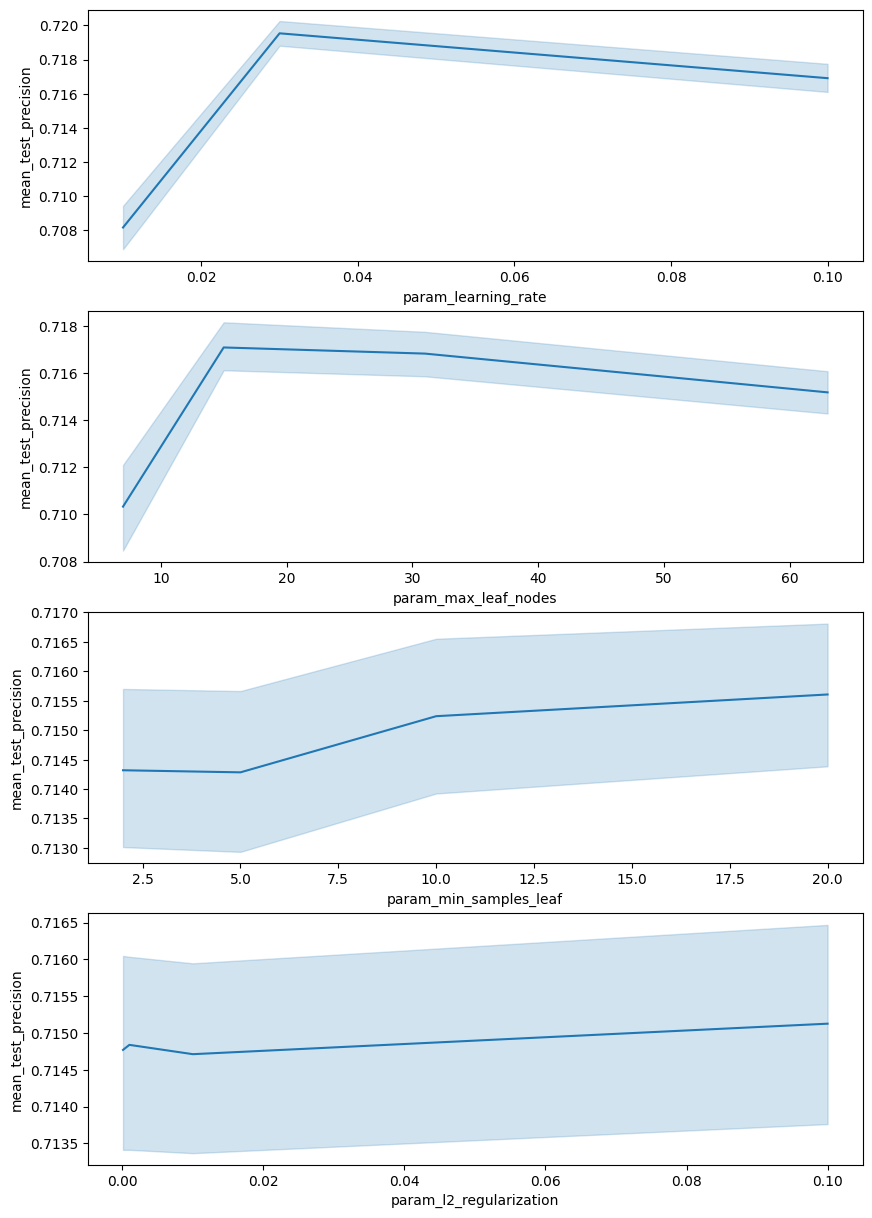

In [27]:
fig, ax = plt.subplots(4,1, figsize=(10, 15))
sb.lineplot(data=hgb_cv_results, x='param_learning_rate', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=hgb_cv_results, x='param_max_leaf_nodes', y='mean_test_precision', ax=ax[1])
sb.lineplot(data=hgb_cv_results, x='param_min_samples_leaf', y='mean_test_precision', ax=ax[2])
sb.lineplot(data=hgb_cv_results, x='param_l2_regularization', y='mean_test_precision', ax=ax[3])

Ved tuning har jeg oppnådd bedre metrikker for både precision og de andre. Standardavviket er litt høyt, som kan tyde på at parameterene kan forbedres. Grafer viser det samme.

### Hist Gradient Boosting; forbedret parametere

In [28]:
hgb_params2 = {
    'learning_rate': [0.02, 0.03, 0.04, 0.05],
    'max_leaf_nodes': [7, 10, 12, 15],
    'min_samples_leaf': [7, 10, 15, 20],
    'l2_regularization': [0.03, 0.07, 0.1],
}

In [29]:
hgb_estimators2, hgb_scores2, hgb_cv_results2 = train(
    HistGradientBoostingClassifier(random_state=global_random_state),
    hgb_params2, 
    dataset_features, 
    targets_encoded
    )
hgb_scores2 = pd.DataFrame(hgb_scores2)
hgb_scores2.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.774416,0.725351,0.689480,0.699456,0.895160
std,0.014758,0.023791,0.023864,0.025646,0.009934
min,0.753672,0.694743,0.657400,0.665960,0.884708
25%,0.767232,0.712074,0.680208,0.689842,0.887751
50%,0.778531,0.725732,0.687238,0.694497,0.893130
75%,0.779661,0.736991,0.701089,0.712615,0.901317
max,0.792986,0.757216,0.721466,0.734367,0.908893


<Axes: xlabel='param_l2_regularization', ylabel='mean_test_precision'>

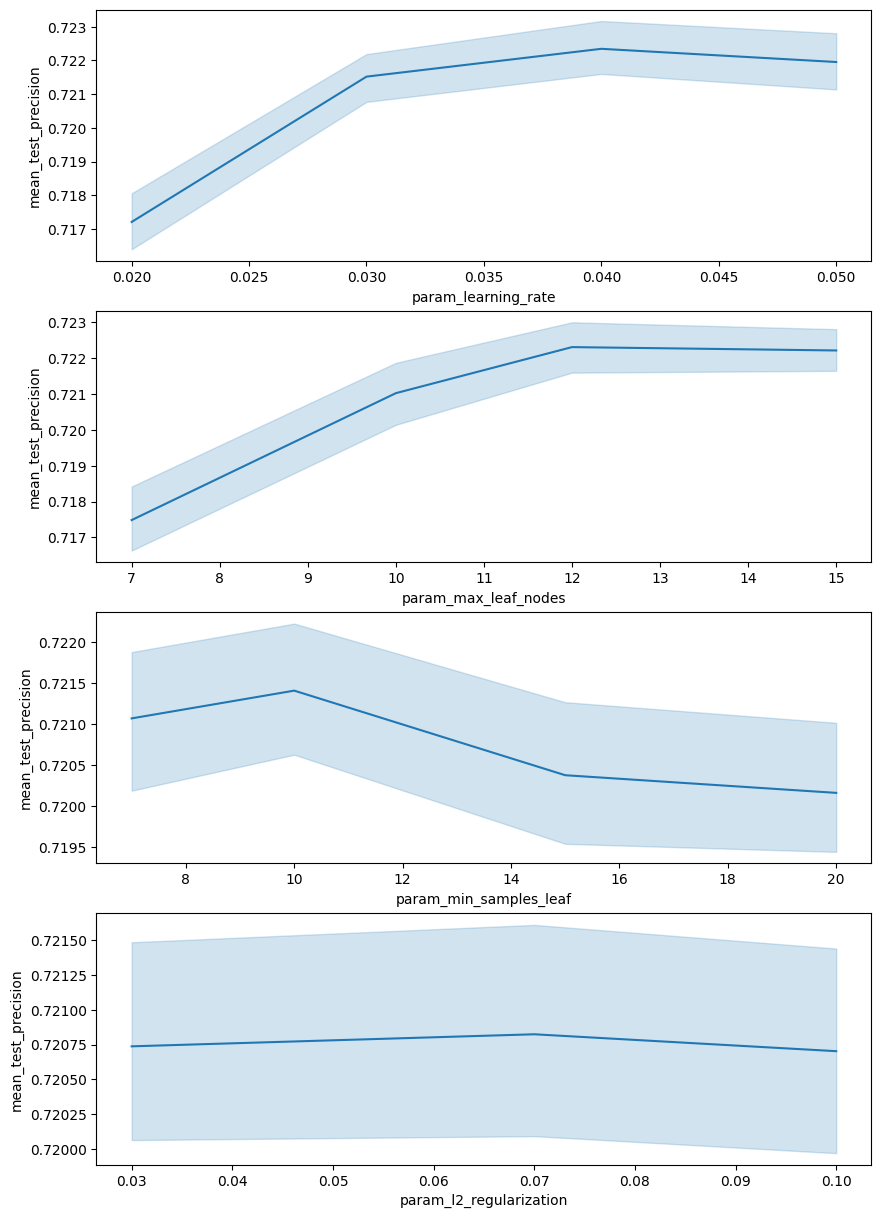

In [30]:
fig, ax = plt.subplots(4,1, figsize=(10, 15))
sb.lineplot(data=hgb_cv_results2, x='param_learning_rate', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=hgb_cv_results2, x='param_max_leaf_nodes', y='mean_test_precision', ax=ax[1])
sb.lineplot(data=hgb_cv_results2, x='param_min_samples_leaf', y='mean_test_precision', ax=ax[2])
sb.lineplot(data=hgb_cv_results2, x='param_l2_regularization', y='mean_test_precision', ax=ax[3])

Jeg har forbedret precision og de andre metrikkene, og standardavviket er lavere. Grafene tyder fortsatt på at parametere kan forbedres.

### Hist Gradient Boosting; forbedret parametere

In [31]:
hgb_params3 = {
    'learning_rate': [0.04],
    'max_leaf_nodes': [8, 10, 12],
    'min_samples_leaf': [8, 10, 12],
    'l2_regularization': [0.03, 0.07, 0.1],
}

In [32]:
hgb_estimators3, hgb_scores3, hgb_cv_results3 = train(
    HistGradientBoostingClassifier(random_state=global_random_state),
    hgb_params3, 
    dataset_features, 
    targets_encoded
    )
hgb_scores3 = pd.DataFrame(hgb_scores3)
hgb_scores3.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.774189,0.725787,0.688883,0.699142,0.894688
std,0.008691,0.014362,0.014890,0.016283,0.010425
min,0.762712,0.710291,0.670061,0.680054,0.883314
25%,0.769492,0.717072,0.681213,0.691398,0.886884
50%,0.774011,0.725732,0.687238,0.694497,0.893281
75%,0.779661,0.727560,0.696814,0.707163,0.901068
max,0.785068,0.748278,0.709087,0.722600,0.908893


<Axes: xlabel='param_l2_regularization', ylabel='mean_test_precision'>

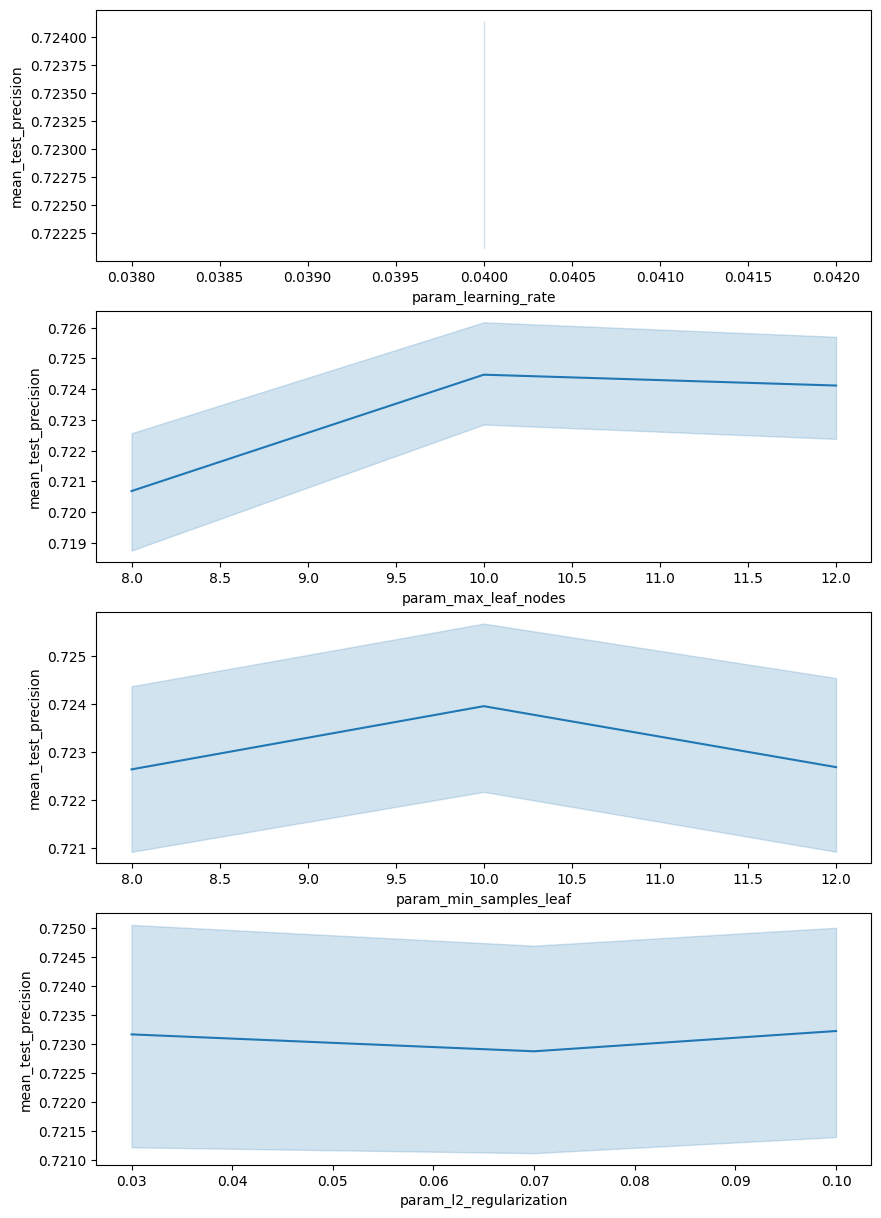

In [33]:
fig, ax = plt.subplots(4,1, figsize=(10, 15))
sb.lineplot(data=hgb_cv_results3, x='param_learning_rate', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=hgb_cv_results3, x='param_max_leaf_nodes', y='mean_test_precision', ax=ax[1])
sb.lineplot(data=hgb_cv_results3, x='param_min_samples_leaf', y='mean_test_precision', ax=ax[2])
sb.lineplot(data=hgb_cv_results3, x='param_l2_regularization', y='mean_test_precision', ax=ax[3])

Grafene er nå relativt rett, metrikkene er ganske høye, samtidig som standardavviket har minket ytterligere.

In [34]:
columns = [
    'param_learning_rate',
    'param_max_leaf_nodes',
    'param_min_samples_leaf',
    'param_l2_regularization',
    'mean_test_precision'
]

hgb_cv_results3_sorted = (
    hgb_cv_results3[columns].groupby(['param_learning_rate', 'param_max_leaf_nodes', 'param_min_samples_leaf', 'param_l2_regularization'],
        as_index=False)['mean_test_precision'].mean().sort_values('mean_test_precision', ascending=False)
)

hgb_cv_results3_sorted.head()

,param_learning_rate,param_max_leaf_nodes,param_min_samples_leaf,param_l2_regularization,mean_test_precision
15,0.04,10,12,0.03,0.725916
14,0.04,10,10,0.10,0.725915
21,0.04,12,10,0.03,0.725847
13,0.04,10,10,0.07,0.725611
18,0.04,12,8,0.03,0.725331


### Hist Gradient Boosting; endelige parametere

In [35]:
hgb_params_final = {
    'learning_rate': [0.04],
    'max_leaf_nodes': [10],
    'min_samples_leaf': [12],
    'l2_regularization': [0.03],
}

In [36]:
hgb_estimators_final, hgb_scores_final, hgb_cv_results_final = train(
    HistGradientBoostingClassifier(random_state=global_random_state),
    hgb_params_final, 
    dataset_features, 
    targets_encoded
    )
hgb_scores_final = pd.DataFrame(hgb_scores_final)
hgb_scores_final.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.774641,0.725737,0.689827,0.699854,0.894237
std,0.011639,0.018218,0.017880,0.019205,0.010324
min,0.759322,0.700727,0.663352,0.672159,0.883302
25%,0.767232,0.717285,0.689185,0.698532,0.886889
50%,0.775141,0.726356,0.690675,0.699256,0.891551
75%,0.784181,0.735410,0.692199,0.703093,0.901137
max,0.787330,0.748905,0.713725,0.726231,0.908306


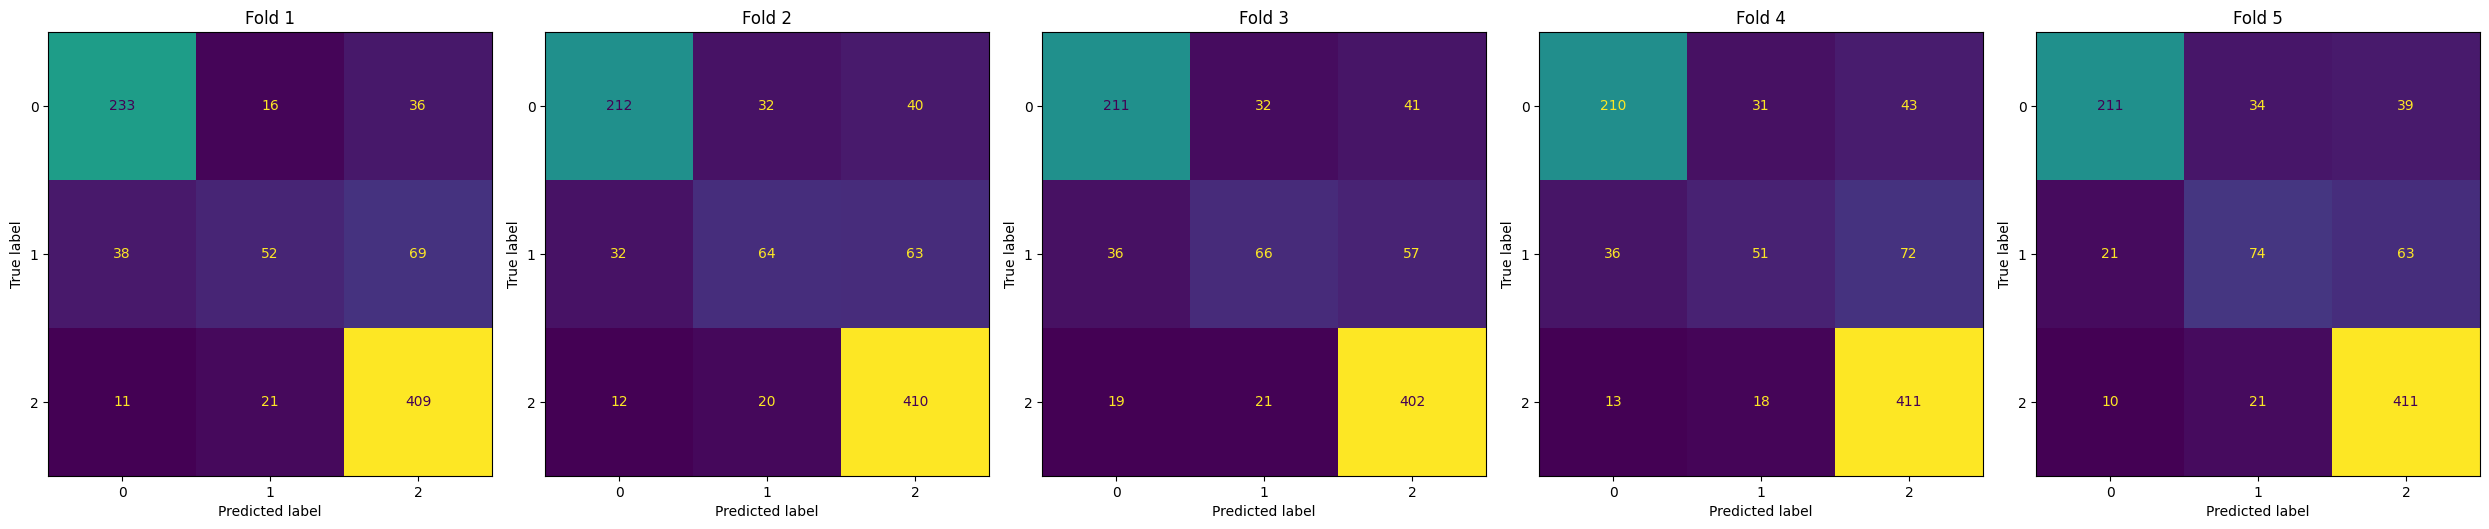

In [94]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=global_random_state)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))

for i, ((train_index, test_index), estimator) in enumerate(
        zip(outer_cv.split(dataset_features, targets_encoded), hgb_estimators_final)):

    ConfusionMatrixDisplay.from_estimator(
        estimator,
        dataset_features.iloc[test_index],
        targets_encoded.iloc[test_index],
        ax=axs[i],
        colorbar=False
    )
    axs[i].set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

Modellen gir ganske stabile resultater på tvers av folds. Modellen er klart best på å predikere klasse 2, ganske god på klasse 0, men svært dårlig på klasse 1. Dette samsvarer med klassefordelingen, ettersom det finnes flest som fullfører, litt færre som går på studiet, og færrest som dropper ut.

### Gaussian Naive Bayes

In [37]:
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

For Gaussian Naive Bayes er det kun en hyperparameter som er hensiktsmessig å tune, og jeg har her også forsøkt å teste denne med brede verdier til å begynne med.

Jeg tunet var_smoothing som er en parameter som legger til et lite tall i beregningen av varians for hver feature. Lav verdi kan gi gode resultater dersom features har nok varians, men kan ellers bli veldig følsom for små variasjoner i dataen og overfitte. Høyere verdi vil gjøre modellen mer robust, med mer stabile sannsynlighetsberegninger som vil senke overfitting, men kan føre til at den predikerer dårlig dersom den blir for høy.

In [38]:
nb_estimators, nb_scores, nb_cv_results = train(
    GaussianNB(),
    nb_params,
    dataset_features,
    targets_encoded
)
nb_scores = pd.DataFrame(nb_scores)
nb_scores.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.690546,0.619966,0.599363,0.603354,0.795991
std,0.015421,0.024583,0.023580,0.025104,0.011896
min,0.666290,0.596057,0.570192,0.574889,0.781904
25%,0.685876,0.596452,0.581949,0.581651,0.790857
50%,0.693785,0.621669,0.603753,0.608843,0.794473
75%,0.702825,0.631762,0.611506,0.615413,0.798491
max,0.703955,0.653888,0.629416,0.635973,0.814231


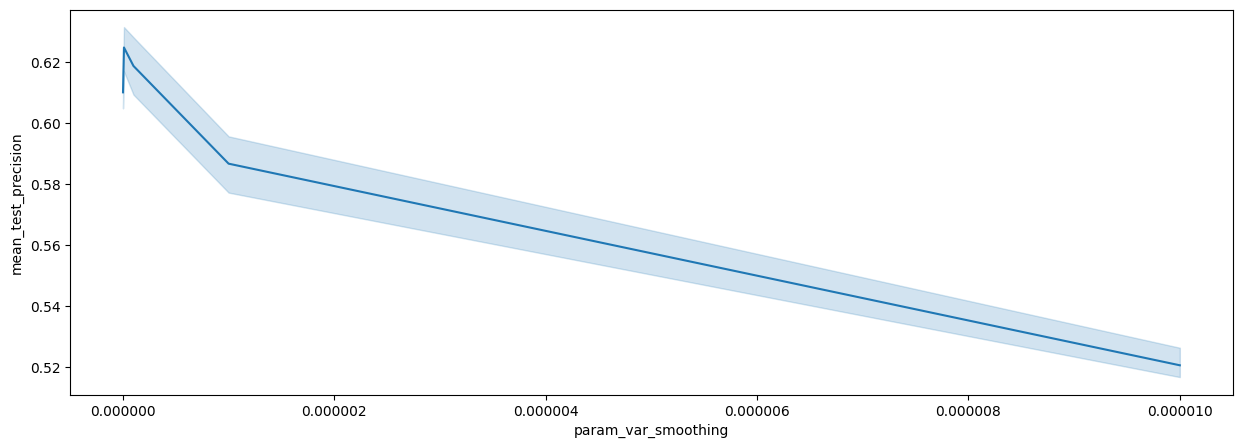

In [39]:
fig, ax = plt.subplots(1, figsize=(15, 5))
sb.lineplot(data=nb_cv_results, x='param_var_smoothing', y='mean_test_precision', ax=ax)
ax.ticklabel_format(style='plain', axis='x')
plt.show()

Grafen synker mye fra omtrent 1e-7 til 1e-6, så jeg vil derfor teste verdier lavere enn 1e-7.

### Gaussian Naive Bayes; forbedret parametere

In [40]:
nb_params2 = {
    'var_smoothing' : [5e-9, 1e-8, 2e-8, 5e-8, 1e-7, 2e-7]
}

In [41]:
nb_estimators2, nb_scores2, nb_cv_results2 = train(
    GaussianNB(),
    nb_params2,
    dataset_features,
    targets_encoded
)
nb_scores2 = pd.DataFrame(nb_scores2)
nb_scores2.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.690546,0.619966,0.599363,0.603354,0.795991
std,0.015421,0.024583,0.023580,0.025104,0.011896
min,0.666290,0.596057,0.570192,0.574889,0.781904
25%,0.685876,0.596452,0.581949,0.581651,0.790857
50%,0.693785,0.621669,0.603753,0.608843,0.794473
75%,0.702825,0.631762,0.611506,0.615413,0.798491
max,0.703955,0.653888,0.629416,0.635973,0.814231


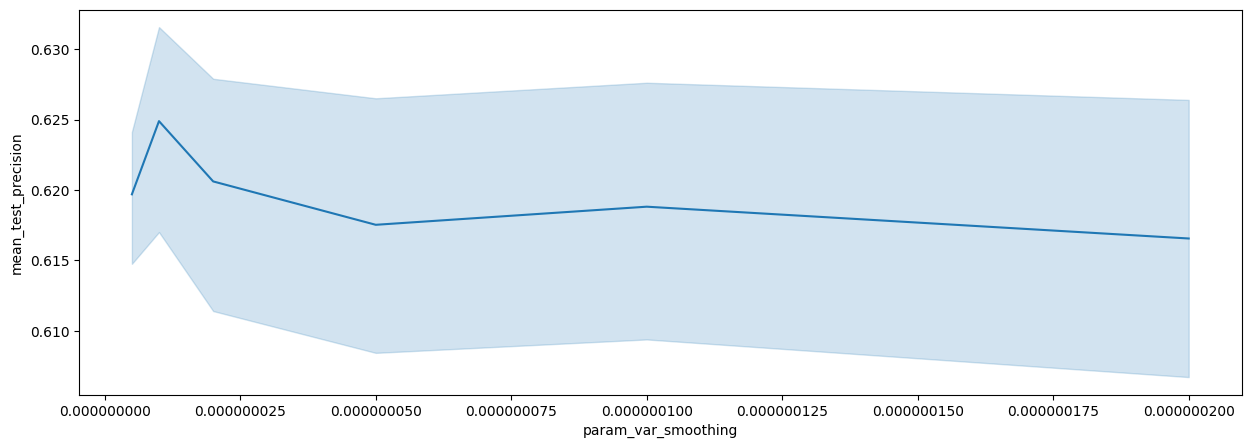

In [42]:
fig, ax = plt.subplots(1, figsize=(15, 5))
sb.lineplot(data=nb_cv_results2, x='param_var_smoothing', y='mean_test_precision', ax=ax)
ax.ticklabel_format(style='plain', axis='x')
plt.show()

In [43]:
columns = [
    'param_var_smoothing',
    'mean_test_precision'
]

nb_cv_results2_sorted = (
    nb_cv_results2[columns].groupby(['param_var_smoothing'],
        as_index=False)['mean_test_precision'].mean().sort_values('mean_test_precision', ascending=False)
)

nb_cv_results2_sorted.head()

,param_var_smoothing,mean_test_precision
1,1.000000e-08,0.624886
2,2.000000e-08,0.620606
0,5.000000e-09,0.619690
4,1.000000e-07,0.618812
3,5.000000e-08,0.617527


Resultatene fra hyperparametertunet Gaussian Naive Bayes viser at det gis best precision ved var_smoothing satt til 1e-08. Gaussian Naive Bayes gir uansett fremdeles lave metrikker i forhold til andre modeller.

### Gaussian Naive Bayes; endelige parametere

In [44]:
nb_params_final = {
    'var_smoothing' : [1e-8]
}

In [45]:
nb_estimators_final, nb_scores_final, nb_cv_results_final = train(
    GaussianNB(),
    nb_params_final,
    dataset_features,
    targets_encoded
)
nb_scores_final = pd.DataFrame(nb_scores_final)
nb_scores_final.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.690546,0.619966,0.599363,0.603354,0.795991
std,0.015421,0.024583,0.023580,0.025104,0.011896
min,0.666290,0.596057,0.570192,0.574889,0.781904
25%,0.685876,0.596452,0.581949,0.581651,0.790857
50%,0.693785,0.621669,0.603753,0.608843,0.794473
75%,0.702825,0.631762,0.611506,0.615413,0.798491
max,0.703955,0.653888,0.629416,0.635973,0.814231


### SVC

In [46]:
svc_pipe = Pipeline([
    ('log', log_transformer),
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=global_random_state))
])
svc_params = {
    "svc__C": [0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1],
    'svc__class_weight': [None, "balanced"]
}

For SVC så valgte jeg å teste 3 ulike hyperparametere. Gamma og C-verdi skal generelt sett påvirke modellen mest, og class_weight valgte å teste ettersom klassefordelingen er skjev.

Parameteren C bestemmer hvor mye modellen skal straffe feil. En lav C-verdi vil gjøre modellen mer robust som vil gjøre overfitting mindre sannsynlig, men kan føre til at presisjonen ettersom den kan skille mønstre for dårlig. En høy C-verdi vil gjøre modellen mer kompleks, slik at den skiller mønstre bedre, men det kan samtidig føre til overfitting ettersom den kan bli for følsom for støy.

Gamma bestemmer hvor langt unna et datapunkt kan påvirke. En lav Gamma-verdi vil kunne gjøre modellen mer stabil og gjøre overfitting mindre sannsylig, men kan samtidig føre til at modellen ikke fanger nok mønstre. En høy Gamma-verdi vil gjøre modellen mer fleksibel ettersom den kan fange opp små detaljer, men den kan samtidig fort bli overfittet ettersom den lettere blir sensitiv for støy. 

Class_weight bestemmer om modellen skal gi mer vekt til enkelte klasser. Om den er satt til None vil modellen være stabil ettersom den ikke gir ekstra vekt til noen klasser, men samtidig så vil den kunne predikere dårlig på sjeldne klasser dersom dataen er ubalansert. Dersom den er satt til balanced så vil ikke de største klassene dominere i et ubalansert datasett som dette, og den vil kunne predikere sjeldnere klasser bedre, men det kan samtidig føre til at den predikerer for dårlig på de større klassene, spesielt dersom datasettet er for balansert.

In [47]:
svc_estimators, svc_scores, svc_cv_results = train(
    svc_pipe, 
    svc_params,
    dataset_features,
    targets_encoded
    )
svc_scores = pd.DataFrame(svc_scores)
svc_scores.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.541582,0.765811,0.378321,0.280980,0.858953
std,0.094561,0.150459,0.100595,0.131856,0.007789
min,0.498305,0.496662,0.333333,0.221719,0.851335
25%,0.499435,0.832768,0.333333,0.222055,0.854887
50%,0.499435,0.833145,0.333333,0.222055,0.857643
75%,0.500000,0.833145,0.333333,0.222222,0.859051
max,0.710734,0.833333,0.558271,0.516851,0.871851


<Axes: xlabel='class_weight', ylabel='mean_test_precision'>

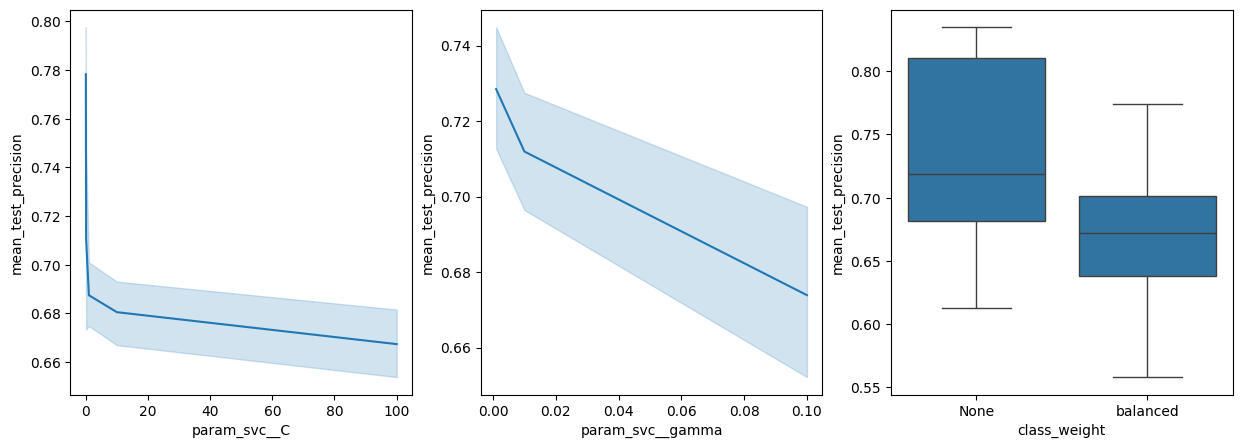

In [48]:
svc_cv_results_plot = svc_cv_results.copy()
svc_cv_results_plot['class_weight'] = svc_cv_results_plot['param_svc__class_weight'].fillna('None').astype(str)
fig, ax = plt.subplots(1,3, figsize=(15, 5))
sb.lineplot(data=svc_cv_results_plot, x='param_svc__C', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=svc_cv_results_plot, x='param_svc__gamma', y='mean_test_precision', ax=ax[1])
sb.boxplot(data=svc_cv_results_plot, x='class_weight', y='mean_test_precision', ax=ax[2])

Metrikkene viser at en lavere c-verdi definitivt er bedre. En lavere gamma ser også ut til å være best. Det ser også ut som at modellene fungerer best med ubalansert class_weight.

### SVC; forbedret parametere

In [49]:
svc_params2 = {
    "svc__C": [0.01, 0.05, 0.1, 0.5, 1],
    "svc__gamma": [0.0001, 0.001, 0.01],
    'svc__class_weight': [None, "balanced"]
}

In [50]:
svc_estimators2, svc_scores2, svc_cv_results2 = train(
    svc_pipe, 
    svc_params2,
    dataset_features,
    targets_encoded
    )
svc_scores2 = pd.DataFrame(svc_scores2)
svc_scores2.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.541582,0.765811,0.378321,0.280980,0.847604
std,0.094561,0.150459,0.100595,0.131856,0.008358
min,0.498305,0.496662,0.333333,0.221719,0.836674
25%,0.499435,0.832768,0.333333,0.222055,0.844346
50%,0.499435,0.833145,0.333333,0.222055,0.845209
75%,0.500000,0.833145,0.333333,0.222222,0.854147
max,0.710734,0.833333,0.558271,0.516851,0.857643


<Axes: xlabel='class_weight', ylabel='mean_test_precision'>

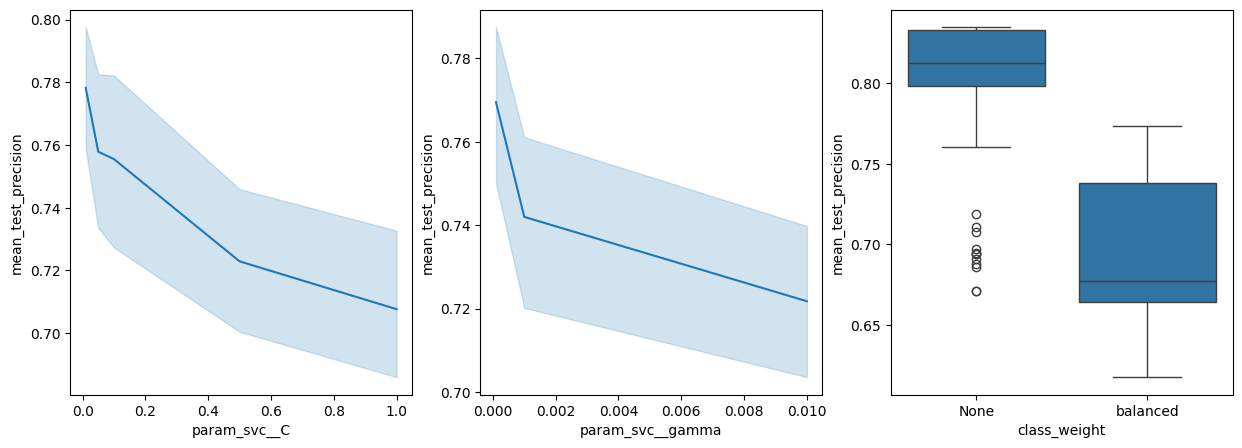

In [51]:
svc_cv_results_plot2 = svc_cv_results2.copy()
svc_cv_results_plot2['class_weight'] = svc_cv_results_plot2['param_svc__class_weight'].fillna('None').astype(str)
fig, ax = plt.subplots(1,3, figsize=(15, 5))
sb.lineplot(data=svc_cv_results_plot2, x='param_svc__C', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=svc_cv_results_plot2, x='param_svc__gamma', y='mean_test_precision', ax=ax[1])
sb.boxplot(data=svc_cv_results_plot2, x='class_weight', y='mean_test_precision', ax=ax[2])

Grafene viser at jeg bør fintune modellen med enda litt lavere verdier på gamma og c. Modellene uten class_weight er definitivt best.

### SVC; forbedret parametere

In [52]:
svc_params3 = {
    "svc__C": [0.0001, 0.001 ,0.01, 0.05],
    "svc__gamma": [0.00001 ,0.0001, 0.001, 0.01],
    "svc__class_weight" : [None]
}

In [53]:
svc_estimators3, svc_scores3, svc_cv_results3 = train(
    svc_pipe, 
    svc_params3,
    dataset_features,
    targets_encoded
    )
svc_scores3 = pd.DataFrame(svc_scores3)
svc_scores3.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.499322,0.833107,0.333333,0.222021,0.794811
std,0.000619,0.000206,0.000000,0.000184,0.015272
min,0.498305,0.832768,0.333333,0.221719,0.777227
25%,0.499435,0.833145,0.333333,0.222055,0.784504
50%,0.499435,0.833145,0.333333,0.222055,0.792814
75%,0.499435,0.833145,0.333333,0.222055,0.803976
max,0.500000,0.833333,0.333333,0.222222,0.815535


<Axes: xlabel='param_svc__gamma', ylabel='mean_test_precision'>

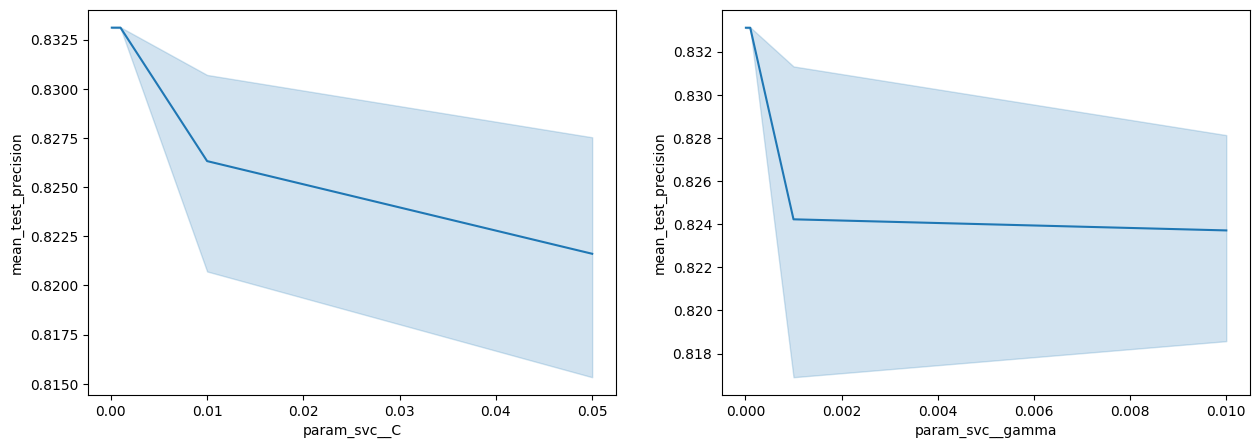

In [54]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=svc_cv_results3, x='param_svc__C', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=svc_cv_results3, x='param_svc__gamma', y='mean_test_precision', ax=ax[1])

In [55]:
columns = [
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_precision'
]

svc_cv_results3_sorted = (
    svc_cv_results3[columns].groupby(['param_svc__C', 'param_svc__gamma'],
        as_index=False)['mean_test_precision'].mean().sort_values('mean_test_precision', ascending=False)
)

svc_cv_results3_sorted.head()

,param_svc__C,param_svc__gamma,mean_test_precision
0,0.0001,0.00001,0.833107
1,0.0001,0.00010,0.833107
2,0.0001,0.00100,0.833107
3,0.0001,0.01000,0.833107
4,0.0010,0.00001,0.833107


Etter å ha finjustert hyperparametere til SVC så har jeg fått en betydelig økning i precision, som nå holder seg stabilt høyt. Det er tydelig at Recall og de andre metrikkene helt klart blir vesentlig dårligere når precision blir høyere. Dette kommer av at modellen nå vil sjelden predikere noe, men når den først gjør det så er det riktig.

Jeg måtte gjøre tuningen nøye ettersom recall stupte ved enkelte verdier da jeg prøvde å øke precision mer. Modellen ser ut til å være optimal med en c-verdi på 0.1, gamma på 0.01 og ingen class-weight. class-weight balanced ville normalt sett økt metrikkene på SVC ettersom det er en avstandsbasert modell og datasettet er ubalansert, men siden fokuset er på precision så vil denne stå som None.

### SVC; endelige parametere

In [56]:
svc_params_final = {
    "svc__C": [0.0001],
    "svc__gamma": [0.0001],
    "svc__class_weight" : [None]
}

In [57]:
svc_estimators_final, svc_scores_final, svc_cv_results_final = train(
    svc_pipe, 
    svc_params_final,
    dataset_features,
    targets_encoded
    )
svc_scores_final = pd.DataFrame(svc_scores_final)
svc_scores_final.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.499322,0.833107,0.333333,0.222021,0.793513
std,0.000619,0.000206,0.000000,0.000184,0.012381
min,0.498305,0.832768,0.333333,0.221719,0.778999
25%,0.499435,0.833145,0.333333,0.222055,0.784304
50%,0.499435,0.833145,0.333333,0.222055,0.793402
75%,0.499435,0.833145,0.333333,0.222055,0.801324
max,0.500000,0.833333,0.333333,0.222222,0.809536


### SVC; Precision mot Recall

In [58]:
svc_params4 = {
    "svc__C": [0.01, 0.05, 0.1, 0.5, 1],
    "svc__gamma": [0.0001, 0.001, 0.01],
    'svc__class_weight': [None, "balanced"]
}

In [59]:
svc_estimators4, svc_scores4, svc_cv_results4 = train(
    svc_pipe, 
    svc_params4,
    dataset_features,
    targets_encoded,
    )
svc_scores4 = pd.DataFrame(svc_scores4)
svc_scores4.describe()

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.541582,0.765811,0.378321,0.280980,0.847604
std,0.094561,0.150459,0.100595,0.131856,0.008358
min,0.498305,0.496662,0.333333,0.221719,0.836674
25%,0.499435,0.832768,0.333333,0.222055,0.844346
50%,0.499435,0.833145,0.333333,0.222055,0.845209
75%,0.500000,0.833145,0.333333,0.222222,0.854147
max,0.710734,0.833333,0.558271,0.516851,0.857643


<Axes: xlabel='class_weight', ylabel='mean_test_recall'>

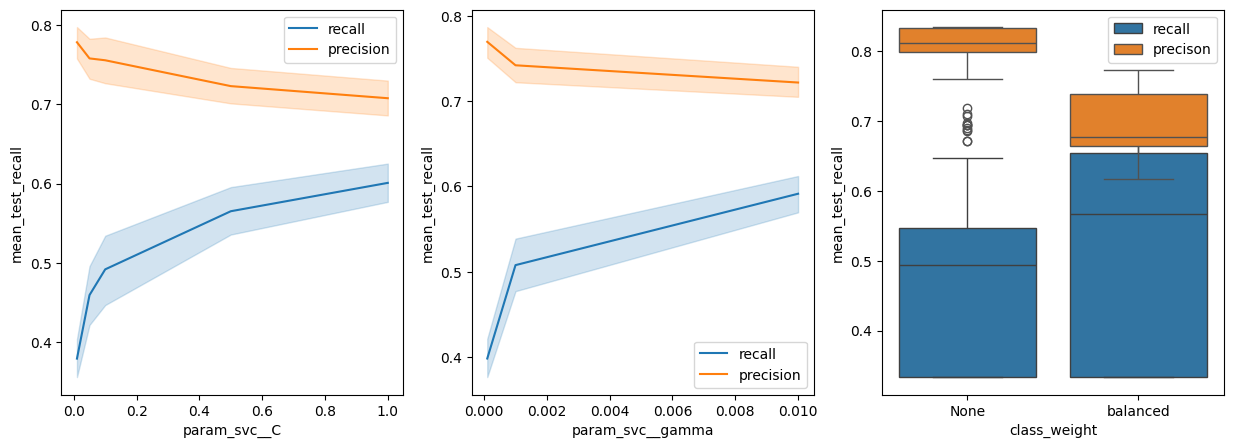

In [60]:
svc_cv_results_plot4 = svc_cv_results4.copy()
svc_cv_results_plot4['class_weight'] = svc_cv_results_plot4['param_svc__class_weight'].fillna('None').astype(str)
fig, ax = plt.subplots(1,3, figsize=(15, 5))
sb.lineplot(data=svc_cv_results_plot4, x='param_svc__C', y='mean_test_recall', ax=ax[0], label="recall")
sb.lineplot(data=svc_cv_results_plot4, x='param_svc__C', y='mean_test_precision', ax=ax[0], label="precision")
sb.lineplot(data=svc_cv_results_plot4, x='param_svc__gamma', y='mean_test_recall', ax=ax[1], label="recall")
sb.lineplot(data=svc_cv_results_plot4, x='param_svc__gamma', y='mean_test_precision', ax=ax[1], label="precision")
sb.boxplot(data=svc_cv_results_plot4, x='class_weight', y='mean_test_recall', ax=ax[2], label="recall")
sb.boxplot(data=svc_cv_results_plot4, x='class_weight', y='mean_test_precision', ax=ax[2], label="precison")


Her vises det tydelig at å øke precision ofrer andre metrikker som blant annet recall.

### MLP

In [61]:
mlp_pipe = Pipeline([
            ('scaler', scaler),
            ('mlp', MLPClassifier(max_iter=300, random_state=global_random_state))
        ])
mlp_params = {
    "mlp__hidden_layer_sizes": [(50,), (100,), (50,50), (100,50), (128,64,32)],
    "mlp__solver": ["adam", "lbfgs"],
    "mlp__alpha": [0.0001, 0.001, 0.01],
    "mlp__learning_rate_init": [0.0001, 0.001, 0.01]
}

For MLP har jeg valgt 4 hyperparametere å tune, nemlig de som skal ha størst påvirkning på modellen. Jeg har også forsøkt å starte med å teste verdier bredt.

Hidden_layer_sizes bestemmer selve arkitekturen til det nevrale nettverket. Det bestemmer hvor mange skjulte lag det skal ha, og hvor mange nevroner hvert lag har. Et lavt antall nevroner eller antall lag vil gjøre treningene raske og minske sannsynligheten for overfitting, samtidig så kan det føre til at modellen blir for enkel og presterer dårlig. Et høyere antall nevroner eller antall lag vil kunne fange opp mer komplekse mønstre, men kan samtidig føre til overfitting og vil utvide treningstiden.

Solver er algoritmen som brukes for å justere vekter under treningen. Adam er standard, og skal være en rask og stabil algoritme. Lbfgs er en alternativ algoritme som kan fungere godt på noen datasett som jeg ønsker å sammenligne med.

Alpha er verdien som bestemmer hvor mye modellen skal straffer store koeffisienter. En lav alpha vil kunne gjøre at modellen finner mer detaljer i dataen, men kan samtidig føre til overfitting. En høyere alpha vil minke sjansen for overfitting og gjøre modellen mer robust, men kan samtidig føre til at modellen ikke finner nok mønstre i dataen.

learning_rate_init bestemmer hvor mye modellen modellen justerer seg dersom vektene oppdaterer seg under trening. En lav verdi vil gjøre treningen mer stabil ettersom den er mer presis, men kan samtidig føre til en lang treningstid. En høyere verdi vil gjøre treningen raskere, men kan føre til at resultatene blir ustabile.

In [62]:
mlp_estimators, mlp_scores, mlp_cv_results = train(
    mlp_pipe, 
    mlp_params,
    dataset_features,
    targets_encoded
    )
mlp_scores = pd.DataFrame(mlp_scores)
mlp_scores.describe()

/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktis

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.761303,0.701211,0.676839,0.684001,0.879380
std,0.012974,0.022961,0.021635,0.023330,0.007631
min,0.741243,0.668520,0.648098,0.652343,0.867643
25%,0.757062,0.686111,0.662180,0.667295,0.876047
50%,0.764706,0.711860,0.683409,0.693175,0.883129
75%,0.768362,0.717674,0.687841,0.698928,0.883318
max,0.775141,0.721889,0.702668,0.708265,0.886764


<Axes: xlabel='hidden_layer_sizes_str', ylabel='mean_test_precision'>

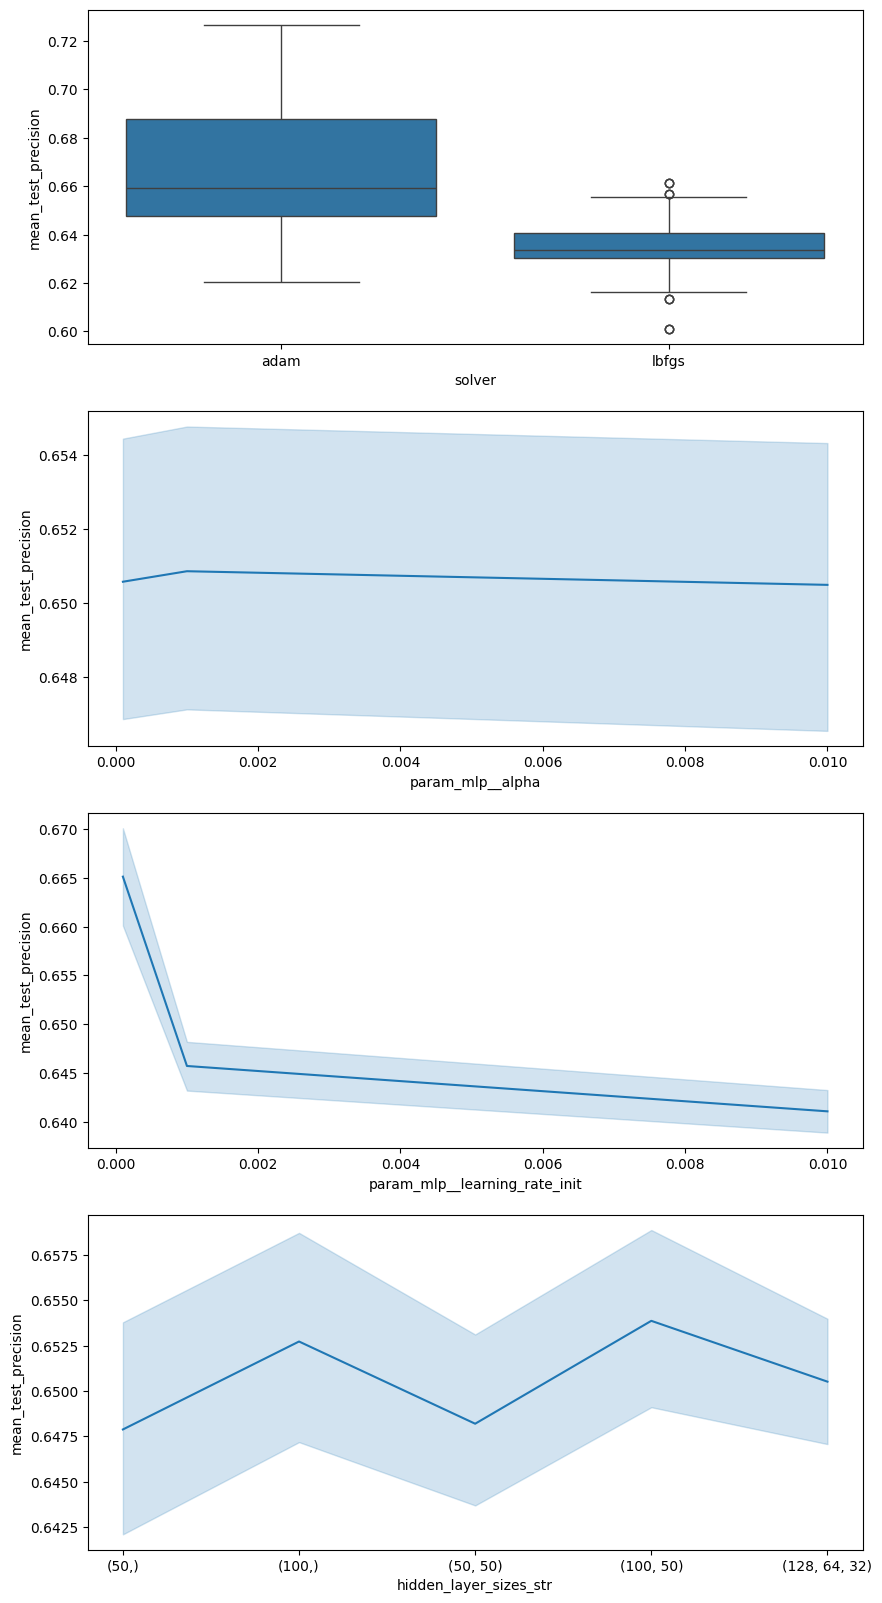

In [63]:
mlp_cv_results_plot = mlp_cv_results.copy()
mlp_cv_results_plot['solver'] = mlp_cv_results_plot['param_mlp__solver'].fillna('None').astype(str)

mlp_cv_results_plot['hidden_layer_sizes_str'] = (mlp_cv_results_plot['param_mlp__hidden_layer_sizes'].astype(str))
fig, ax = plt.subplots(4,1, figsize=(10, 20))
sb.boxplot(data=mlp_cv_results_plot, x='solver', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=mlp_cv_results_plot, x='param_mlp__alpha', y='mean_test_precision', ax=ax[1])
sb.lineplot(data=mlp_cv_results_plot, x='param_mlp__learning_rate_init', y='mean_test_precision', ax=ax[2])
sb.lineplot(data=mlp_cv_results_plot, x='hidden_layer_sizes_str', y='mean_test_precision', ax=ax[3])

Som forventet er adam som solver klart best. Alpha verdien er såvidt bedre på litt lavere verdi, men ser ikke ut til å påvirke resultatene stort. Learning_rate er klart best på en lavere verdi. Å bruke lag (100,), (100,50) eller (128,64,32) ser ut til å være best.

### MLP; forbedret parametere

In [64]:
mlp_params2 = {
    "mlp__hidden_layer_sizes": [(100,), (100,50), (128,64,32)],
    "mlp__solver": ["adam"],
    "mlp__alpha": [0.001, 0.05, 0.01],
    "mlp__learning_rate_init": [0.00001, 0.0001, 0.001]
}

In [65]:
mlp_estimators2, mlp_scores2, mlp_cv_results2 = train(
    mlp_pipe, 
    mlp_params2,
    dataset_features,
    targets_encoded
    )
mlp_scores2 = pd.DataFrame(mlp_scores2)
mlp_scores2.describe()

/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktis

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.762434,0.702283,0.677929,0.685046,0.879484
std,0.012982,0.023235,0.021649,0.023530,0.007556
min,0.742373,0.669424,0.649271,0.653230,0.867919
25%,0.757062,0.686111,0.662180,0.667295,0.876047
50%,0.768362,0.716317,0.687684,0.697512,0.883318
75%,0.769231,0.717674,0.687841,0.698928,0.883370
max,0.775141,0.721889,0.702668,0.708265,0.886764


<Axes: xlabel='hidden_layer_sizes_str', ylabel='mean_test_precision'>

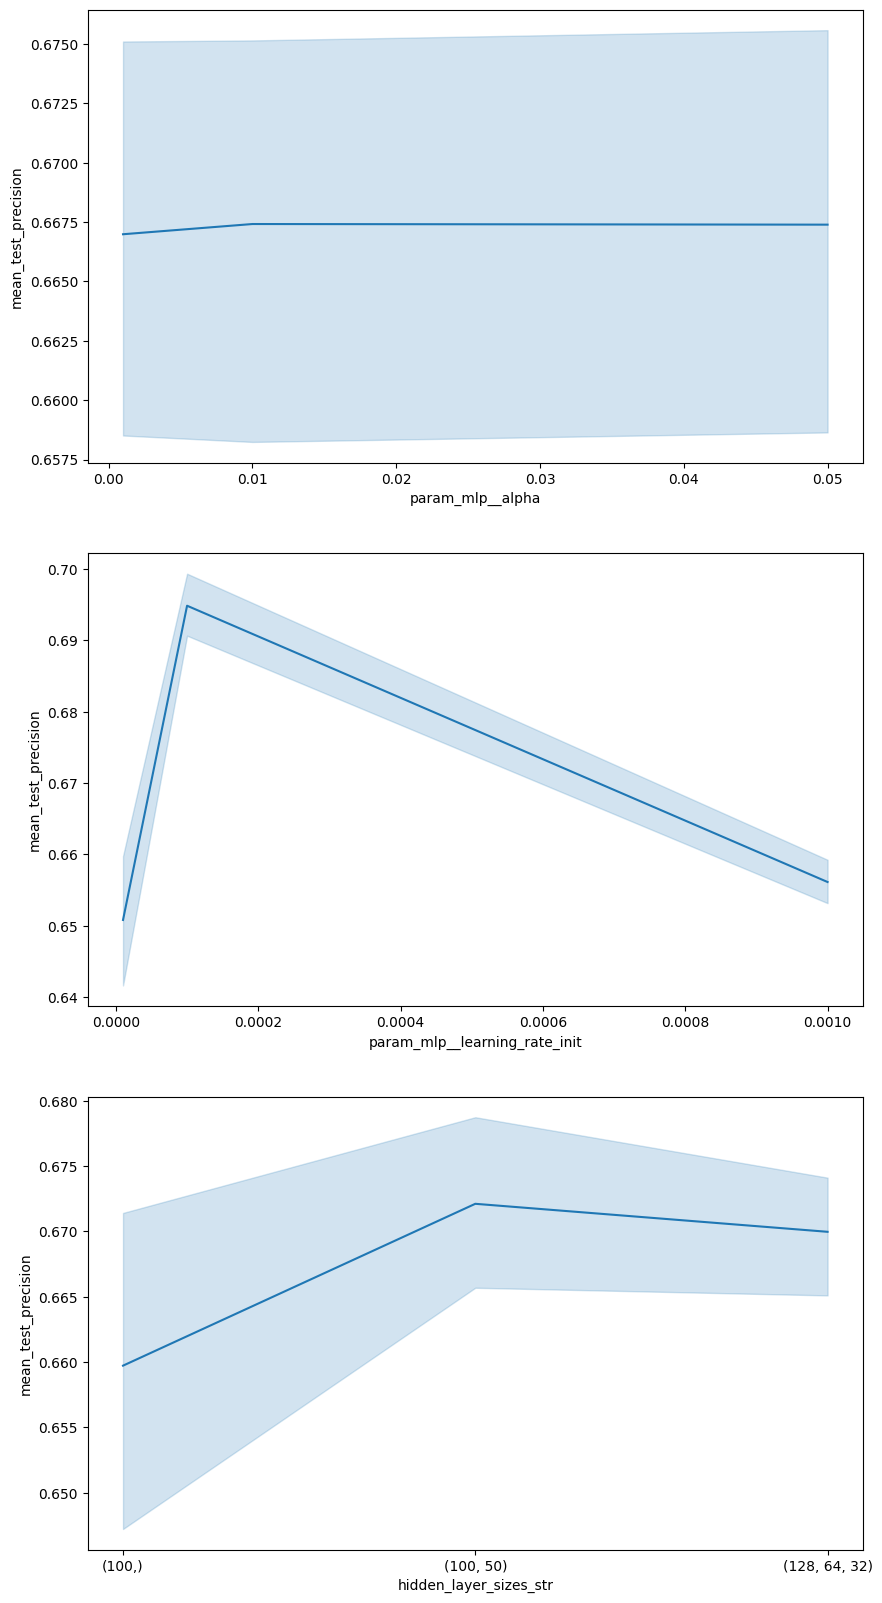

In [66]:
mlp_cv_results_plot2 = mlp_cv_results2.copy()
mlp_cv_results_plot2['hidden_layer_sizes_str'] = (mlp_cv_results_plot2['param_mlp__hidden_layer_sizes'].astype(str))

fig, ax = plt.subplots(3,1, figsize=(10, 20))
sb.lineplot(data=mlp_cv_results_plot2, x='param_mlp__alpha', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=mlp_cv_results_plot2, x='param_mlp__learning_rate_init', y='mean_test_precision', ax=ax[1])
sb.lineplot(data=mlp_cv_results_plot2, x='hidden_layer_sizes_str', y='mean_test_precision', ax=ax[2])

Alpha ser ut til å være mest stabil rundt 0.01. Learning rate er klart best rundt 0.0001. (100,50) og (128,64,32) ser ut til å være best for lag.

### MLP; forbedret parametere

In [67]:
mlp_params3 = {
    "mlp__hidden_layer_sizes": [(100,), (100,50), (128,64,32)],
    "mlp__solver": ["adam"],
    "mlp__alpha": [0.01],
    "mlp__learning_rate_init": [0.0001]
}

In [68]:
mlp_estimators3, mlp_scores3, mlp_cv_results3 = train(
    mlp_pipe, 
    mlp_params3,
    dataset_features,
    targets_encoded
    )
mlp_scores3 = pd.DataFrame(mlp_scores3)
mlp_scores3.describe()

/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktis

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.761529,0.701684,0.677424,0.684545,0.879415
std,0.014029,0.023772,0.023012,0.024489,0.007752
min,0.740113,0.667856,0.647344,0.651637,0.867455
25%,0.757062,0.686111,0.662180,0.667295,0.876047
50%,0.764706,0.711860,0.683409,0.693175,0.883129
75%,0.768362,0.720705,0.687841,0.698928,0.883681
max,0.777401,0.721889,0.706348,0.711693,0.886764


<Axes: xlabel='hidden_layer_sizes_str', ylabel='mean_test_precision'>

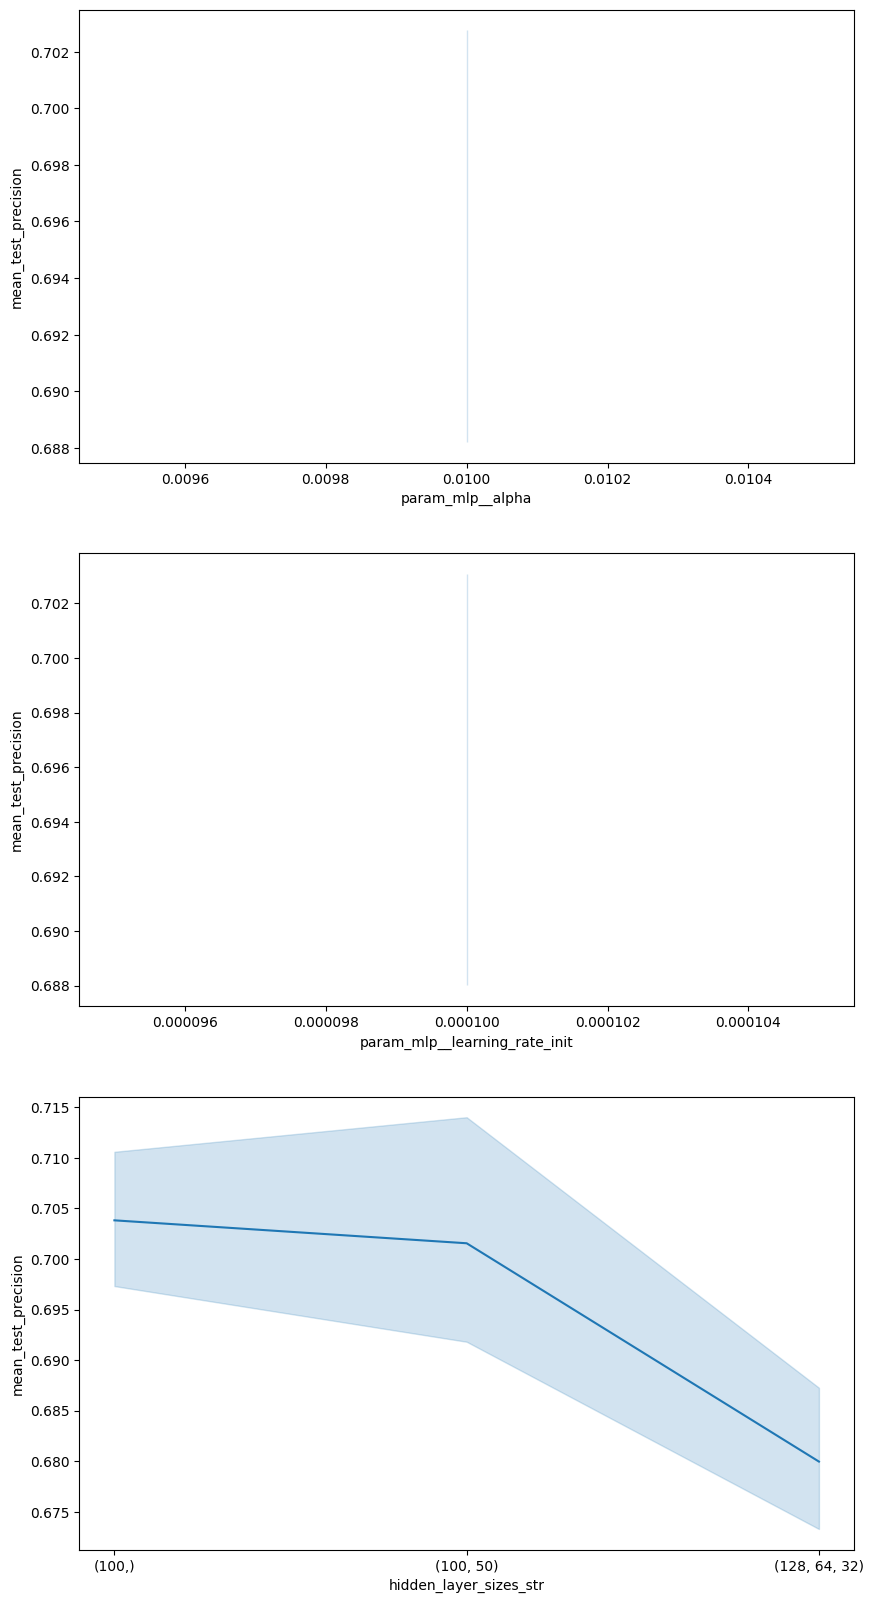

In [69]:
mlp_cv_results_plot3 = mlp_cv_results3.copy()
mlp_cv_results_plot3['hidden_layer_sizes_str'] = (mlp_cv_results_plot3['param_mlp__hidden_layer_sizes'].astype(str))

fig, ax = plt.subplots(3,1, figsize=(10, 20))
sb.lineplot(data=mlp_cv_results_plot3, x='param_mlp__alpha', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=mlp_cv_results_plot3, x='param_mlp__learning_rate_init', y='mean_test_precision', ax=ax[1])
sb.lineplot(data=mlp_cv_results_plot3, x='hidden_layer_sizes_str', y='mean_test_precision', ax=ax[2])

De beste resultatene blir oppnådd med (100,50) som neuroner og lag, men resultatene er mer stabile på (100,).

### MLP; endelige parametere

In [70]:
mlp_params_final = {
    "mlp__hidden_layer_sizes": [(100,)],
    "mlp__solver": ["adam"],
    "mlp__alpha": [0.01],
    "mlp__learning_rate_init": [0.0001]
}

In [71]:
mlp_estimators_final, mlp_scores_final, mlp_cv_results_final = train(
    mlp_pipe, 
    mlp_params_final,
    dataset_features,
    targets_encoded
    )
mlp_scores_final = pd.DataFrame(mlp_scores_final)
mlp_scores_final.describe()

/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktisk maskinlæring/Oblig 4/Mandatory_Artificial_Neural_Networks/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/finken/Documents/Skole/Praktis

,accuracy,precision,recall,f1,roc_auc
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.761755,0.699977,0.674004,0.681171,0.882308
std,0.015113,0.027013,0.024860,0.027492,0.006905
min,0.738983,0.659137,0.636774,0.639724,0.874724
25%,0.757062,0.686111,0.662180,0.667295,0.876047
50%,0.764706,0.711860,0.683409,0.693175,0.883129
75%,0.768362,0.720889,0.687841,0.698928,0.886764
max,0.779661,0.721889,0.699816,0.706733,0.890879


In [72]:
tf_pipe = Pipeline([
        ('scaler', scaler),
        ('tf', KerasClassifier(model=build_tensorflow_model, verbose=0, random_state=global_random_state))
    ])
tf_params = {
    "tf__model__hidden_neurons1": [64, 128],
    "tf__model__hidden_neurons2": [32, 64],
    "tf__model__dropout_rate": [0.0, 0.3],
    "tf__epochs": [5],
    "tf__batch_size": [64]
}

Jeg har her valgt å tune 5 viktige parametere for Tensorflow sine modeller. Ettersom det tar såpass lang tid å kjøre disse modellene så satt jeg antall epochs lavt, og tuner denne og batch size senere

Modellene mine har to skjulte lag, så jeg tuner antall nevroner i disse lagene. En lav verdi vil gi raskere treninger og mindre sjanse for overfitting, men kan samtidig føre til at modellen ikke finner nok mønstre. En høyere verdi kan la modellen lære mer komplekse mønstre, men vil føre til lenger treningstid og kan føre til overfitting.

Dropout_rate er når modellen skrur av noen av nevronene under trening, og den bestemmer hvor mye modellen reguleres. En lav verdi vil la modellen kunne lære raskt, men kan føre til overfitting. En høyere verdi minke sannsynligheten for overfitting, men vil gjøre at modellen lærer saktere og kan eventuelt ikke lære seg nok mønstre.

Epochs er hvor mange ganger modellen ser datasettet. En lav verdi vil gi rask trening, men kan føre til at modellen ikke lærer seg nok mønstre. En høyere verdi vil kunne la modellen finne mer komplekse mønstre, men vil øke treningstiden og sannsynligheten for overfitting.

Batch_size er antall datapunkter som modellen må bruke før den kan oppdatere vektene. En lav batch_size vil gi mange små oppdateringer som gir bedre generalisering, men kan føre til lenger treningstid og ustabile resultater ved at loss går opp og ned. En høyere verdi vil gi raskere treninger og mer stabil læring for modellen, men kan føre til overfitting dersom den finner for komplekse mønstre på trening.

In [73]:
tf_estimators, tf_scores, tf_cv_results = train(
    tf_pipe, 
    tf_params,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    n_jobs=1
    )
tf_scores = pd.DataFrame(tf_scores)
tf_scores.describe()

2025-12-04 15:22:40.169290: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-12-04 15:22:45.457034: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.758363,0.696392,0.666104,0.673634
std,0.015788,0.029593,0.024607,0.027679
min,0.735593,0.655704,0.634008,0.636104
25%,0.752542,0.678354,0.652116,0.657416
50%,0.757919,0.700234,0.668975,0.678890
75%,0.769492,0.723147,0.676431,0.688149
max,0.776271,0.724523,0.698989,0.707614


<Axes: xlabel='param_tf__model__dropout_rate', ylabel='mean_test_precision'>

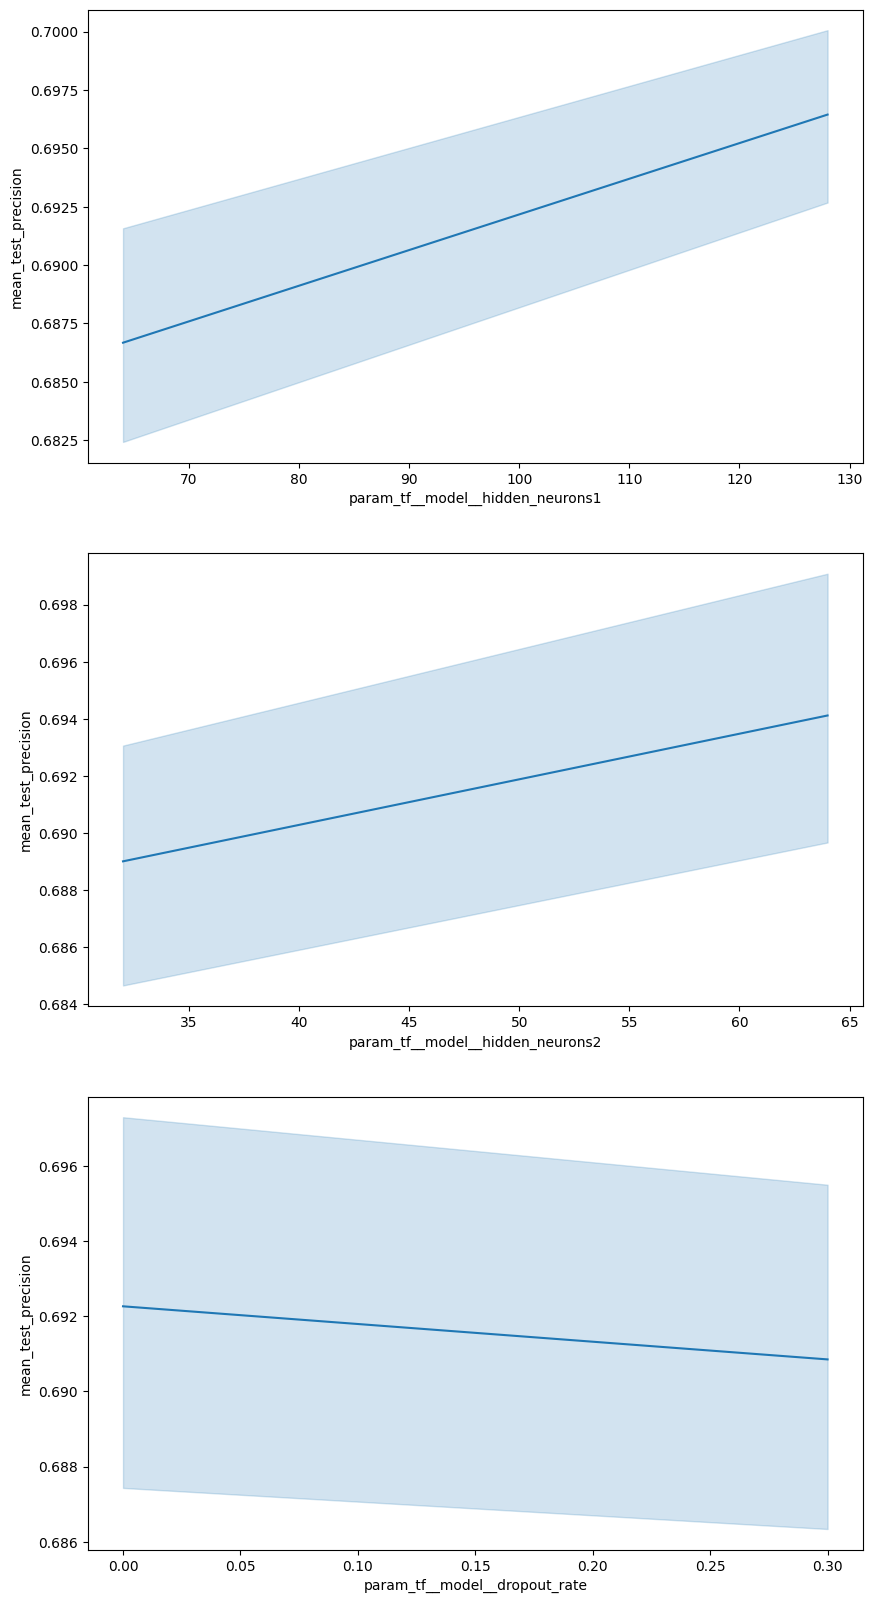

In [74]:
fig, ax = plt.subplots(3,1, figsize=(10, 20))
sb.lineplot(data=tf_cv_results, x='param_tf__model__hidden_neurons1', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=tf_cv_results, x='param_tf__model__hidden_neurons2', y='mean_test_precision', ax=ax[1])
sb.lineplot(data=tf_cv_results, x='param_tf__model__dropout_rate', y='mean_test_precision', ax=ax[2])

Modellen presterer bedre på et høyere antall nevroner, og er litt dårligere med dropout_rate.

In [75]:
tf_params2 = {
    "tf__model__hidden_neurons1": [64, 128, 192],
    "tf__model__hidden_neurons2": [32, 64, 96],
    "tf__model__dropout_rate": [0.0],
    "tf__epochs": [5],
    "tf__batch_size": [64]
}

In [76]:
tf_estimators2, tf_scores2, tf_cv_results2 = train(
    tf_pipe, 
    tf_params2,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    n_jobs=1
    )
tf_scores2 = pd.DataFrame(tf_scores2)
tf_scores2.describe()

2025-12-04 15:24:29.486808: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-12-04 15:24:34.490032: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.768536,0.716872,0.682075,0.691614
std,0.003574,0.008002,0.011138,0.011294
min,0.763842,0.706173,0.672657,0.680516
25%,0.766102,0.711972,0.672829,0.681035
50%,0.769492,0.718451,0.676601,0.689953
75%,0.770362,0.720971,0.693538,0.703262
max,0.772881,0.726791,0.694752,0.703305


<Axes: xlabel='param_tf__model__hidden_neurons2', ylabel='mean_test_precision'>

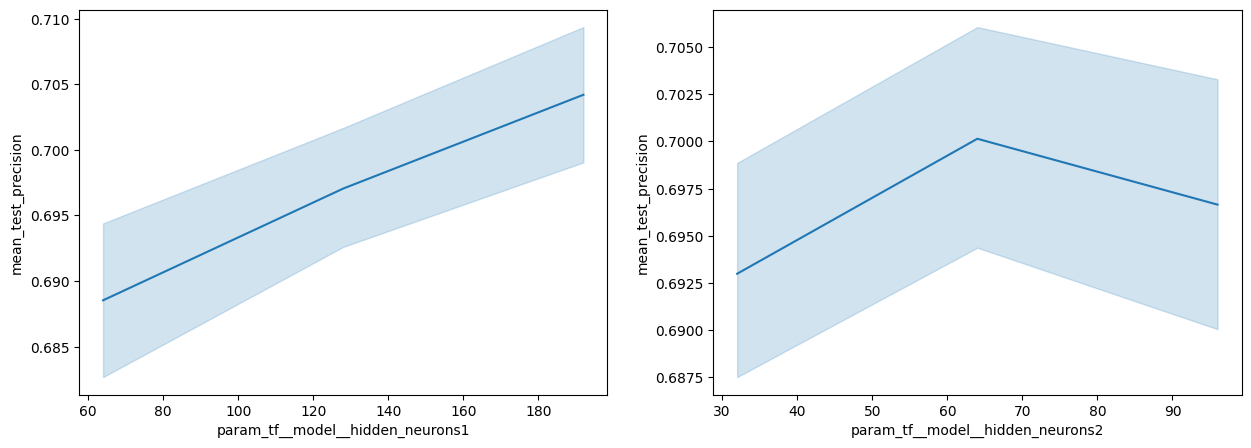

In [77]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=tf_cv_results2, x='param_tf__model__hidden_neurons1', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=tf_cv_results2, x='param_tf__model__hidden_neurons2', y='mean_test_precision', ax=ax[1])

Et høyere antall nevroner i første lag ser ut til å fungere godt. Jeg tester derfor et enda høyere lag.

In [78]:
tf_params3 = {
    "tf__model__hidden_neurons1": [128, 192, 256],
    "tf__model__hidden_neurons2": [64, 96, 128],
    "tf__model__dropout_rate": [0.0],
    "tf__epochs": [5],
    "tf__batch_size": [64]
}

In [79]:
tf_estimators3, tf_scores3, tf_cv_results3 = train(
    tf_pipe, 
    tf_params3,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    n_jobs=1
    )
tf_scores3 = pd.DataFrame(tf_scores3)
tf_scores3.describe()

2025-12-04 15:26:27.930222: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-12-04 15:26:33.482032: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.766952,0.715059,0.679393,0.689120
std,0.004252,0.007867,0.009120,0.009275
min,0.762443,0.706173,0.672657,0.680516
25%,0.763842,0.711906,0.672829,0.681035
50%,0.766102,0.711972,0.676601,0.689953
75%,0.769492,0.718451,0.680125,0.690793
max,0.772881,0.726791,0.694752,0.703305


<Axes: xlabel='param_tf__model__hidden_neurons2', ylabel='mean_test_precision'>

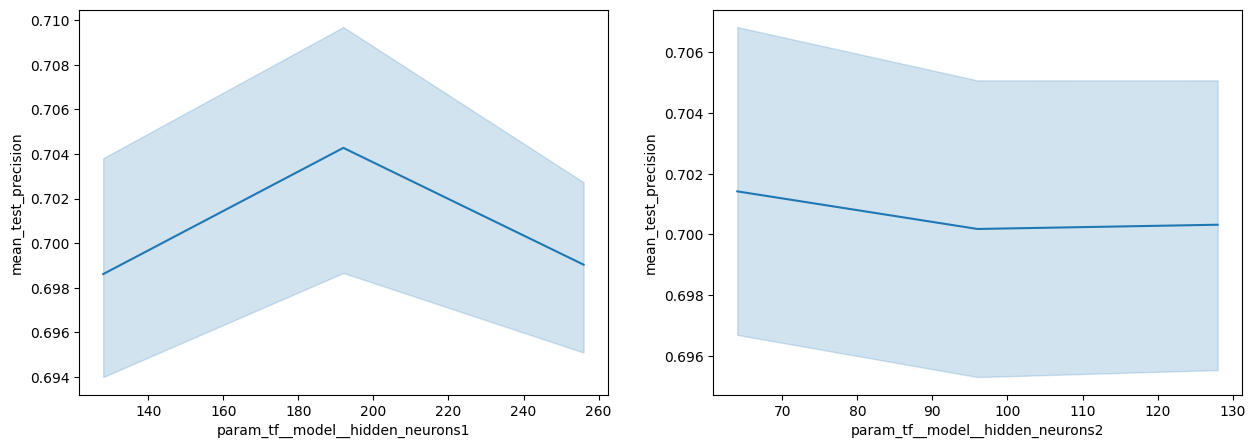

In [80]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=tf_cv_results3, x='param_tf__model__hidden_neurons1', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=tf_cv_results3, x='param_tf__model__hidden_neurons2', y='mean_test_precision', ax=ax[1])

Ingen forbedring ved å øke nevroner i første lag.

In [81]:
columns = [
    'param_tf__model__hidden_neurons1',
    'param_tf__model__hidden_neurons2',
    'mean_test_precision'
]

tf_cv_results3_sorted = (
    tf_cv_results3[columns].groupby(['param_tf__model__hidden_neurons1', 'param_tf__model__hidden_neurons2'],
        as_index=False)['mean_test_precision'].mean().sort_values('mean_test_precision', ascending=False)
)

tf_cv_results3_sorted.head()

,param_tf__model__hidden_neurons1,param_tf__model__hidden_neurons2,mean_test_precision
3,192,64,0.708971
4,192,96,0.702258
5,192,128,0.701598
2,128,128,0.701127
6,256,64,0.699884


Modellen fungerer i snitt best med 192 nevroner i første lag, og 64 nevroner i andre lag. Jeg beholder disse for tuning av de andre parameterene. Hvor mange nevroner i lag som er optimalt kan variere litt når jeg tuner andre parametere, men ikke så veldig mye. Dessuten kan ikke alle tunes likt pga kjøretid.

In [82]:
tf_params4 = {
    "tf__model__hidden_neurons1": [192],
    "tf__model__hidden_neurons2": [64],
    "tf__model__dropout_rate": [0.0],
    "tf__epochs": [5, 10, 20, 30],
    "tf__batch_size": [32, 64, 128]
}

In [83]:
tf_estimators4, tf_scores4, tf_cv_results4 = train(
    tf_pipe, 
    tf_params4,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    n_jobs=1
    )
tf_scores4 = pd.DataFrame(tf_scores4)
tf_scores4.describe()

2025-12-04 15:28:32.023349: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-12-04 15:28:37.077404: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

2025-12-04 15:29:03.332617: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-12-04 15:29:08.421653: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.769213,0.719976,0.686401,0.696257
std,0.009942,0.014525,0.019177,0.018783
min,0.758192,0.703288,0.672497,0.681035
25%,0.766102,0.711972,0.672657,0.682139
50%,0.766968,0.716769,0.676601,0.689953
75%,0.769492,0.726791,0.693050,0.701729
max,0.785311,0.741061,0.717200,0.726431


<Axes: xlabel='param_tf__batch_size', ylabel='mean_test_precision'>

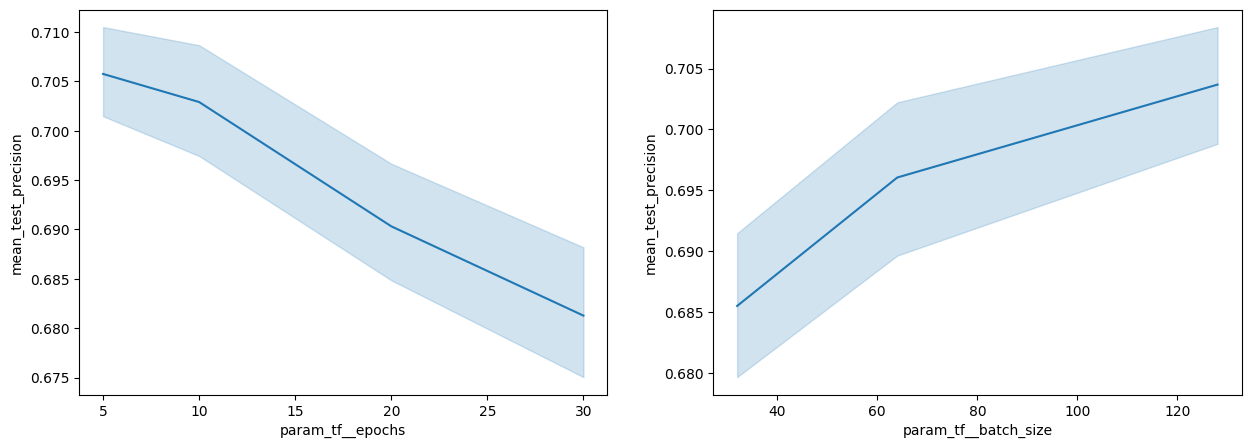

In [84]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=tf_cv_results4, x='param_tf__epochs', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=tf_cv_results4, x='param_tf__batch_size', y='mean_test_precision', ax=ax[1])

Modellen fungerer best med et lavere antall epochs, trolig fordi den overfitter med for mange. Batch_size ser ut til å fungere bedre med en høyere verdi.

In [85]:
tf_params5 = {
    "tf__model__hidden_neurons1": [192],
    "tf__model__hidden_neurons2": [64],
    "tf__model__dropout_rate": [0.0],
    "tf__epochs": [5, 8, 10],
    "tf__batch_size": [64, 128, 192]
}

In [86]:
tf_estimators5, tf_scores5, tf_cv_results5 = train(
    tf_pipe, 
    tf_params5,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    n_jobs=1
    )
tf_scores5 = pd.DataFrame(tf_scores5)
tf_scores5.describe()

2025-12-04 15:32:24.287648: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-12-04 15:32:29.837123: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.769213,0.719976,0.686401,0.696257
std,0.009942,0.014525,0.019177,0.018783
min,0.758192,0.703288,0.672497,0.681035
25%,0.766102,0.711972,0.672657,0.682139
50%,0.766968,0.716769,0.676601,0.689953
75%,0.769492,0.726791,0.693050,0.701729
max,0.785311,0.741061,0.717200,0.726431


<Axes: xlabel='param_tf__batch_size', ylabel='mean_test_precision'>

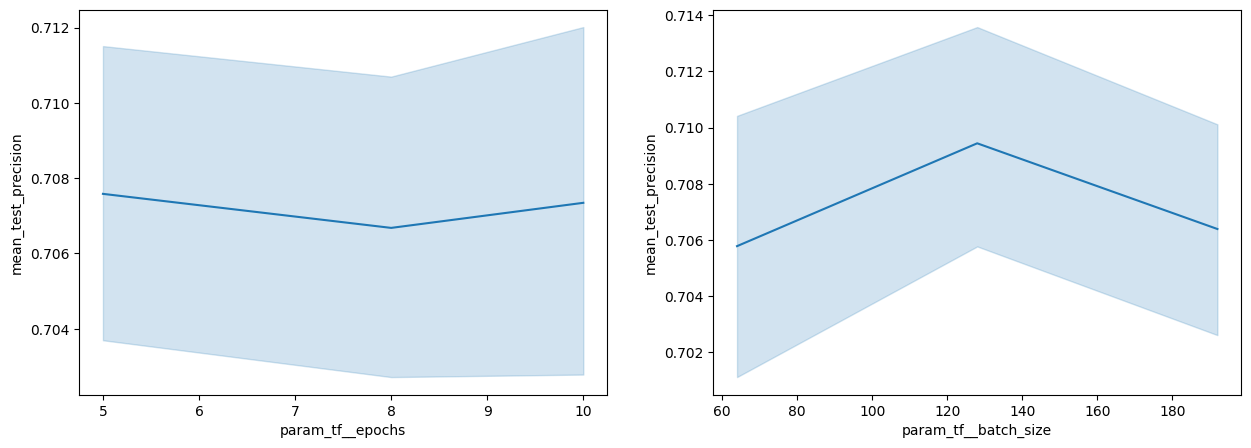

In [87]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sb.lineplot(data=tf_cv_results5, x='param_tf__epochs', y='mean_test_precision', ax=ax[0])
sb.lineplot(data=tf_cv_results5, x='param_tf__batch_size', y='mean_test_precision', ax=ax[1])

In [88]:
columns = [
    'param_tf__epochs',
    'param_tf__batch_size',
    'mean_test_precision'
]

tf_cv_results5_sorted = (
    tf_cv_results5[columns].groupby(['param_tf__epochs', 'param_tf__batch_size'],
        as_index=False)['mean_test_precision'].mean().sort_values('mean_test_precision', ascending=False)
)

tf_cv_results5_sorted.head()

,param_tf__epochs,param_tf__batch_size,mean_test_precision
7,10,128,0.711420
1,5,128,0.709009
0,5,64,0.708971
4,8,128,0.707886
5,8,192,0.707858


In [89]:
tf_params_final = {
    "tf__model__hidden_neurons1": [192],
    "tf__model__hidden_neurons2": [64],
    "tf__model__dropout_rate": [0.0],
    "tf__epochs": [10],
    "tf__batch_size": [128]
}

In [90]:
tf_estimators_final, tf_scores_final, tf_cv_results_final = train(
    tf_pipe, 
    tf_params_final,
    dataset_features,
    targets_encoded,
    scoring=tensorflow_scoring,
    n_jobs=1
    )
tf_scores_final = pd.DataFrame(tf_scores_final)
tf_scores_final.describe()

2025-12-04 15:34:28.723240: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-12-04 15:34:33.772251: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.762207,0.710469,0.681363,0.689893
std,0.004767,0.011662,0.015330,0.014131
min,0.757062,0.693395,0.665783,0.676769
25%,0.758192,0.703288,0.672497,0.680532
50%,0.761582,0.716769,0.673588,0.682139
75%,0.766968,0.719417,0.693050,0.701729
max,0.767232,0.719480,0.701896,0.708296


## Sammenligning av modeller

In [91]:
training_results = pd.DataFrame({
    'Metric' : ['Accuracy', 'Precision', 'Recall', "F1", "ROC"],
    'HGB' : [hgb_scores_final['accuracy'].mean(), hgb_scores_final['precision'].mean(), hgb_scores_final['recall'].mean(), hgb_scores_final['f1'].mean(), hgb_scores_final['roc_auc'].mean()],
    'NB' : [nb_scores_final['accuracy'].mean(), nb_scores_final['precision'].mean(), nb_scores_final['recall'].mean(), nb_scores_final['f1'].mean(), nb_scores_final['roc_auc'].mean()],
    'SVC' : [svc_scores_final['accuracy'].mean(), svc_scores_final['precision'].mean(), svc_scores_final['recall'].mean(), svc_scores_final['f1'].mean(), svc_scores_final['roc_auc'].mean()],
    'MLP' : [mlp_scores_final['accuracy'].mean(), mlp_scores_final['precision'].mean(), mlp_scores_final['recall'].mean(), mlp_scores_final['f1'].mean(), mlp_scores_final['roc_auc'].mean()],
    'TF' : [tf_scores_final['accuracy'].mean(), tf_scores_final['precision'].mean(), tf_scores_final['recall'].mean(), tf_scores_final['f1'].mean(), "None"]
})
training_results.set_index('Metric', inplace=True)
training_results

,HGB,NB,SVC,MLP,TF
Metric,,,,,
Accuracy,0.774641,0.690546,0.499322,0.761755,0.762207
Precision,0.725737,0.619966,0.833107,0.699977,0.710469
Recall,0.689827,0.599363,0.333333,0.674004,0.681363
F1,0.699854,0.603354,0.222021,0.681171,0.689893
ROC,0.894237,0.795991,0.793513,0.882308,None


Modellen med høyest precision er SVC, men med så høy precision så blir de andre metrikkene svært dårlige. Den som er best i sin helhet er Gradient Boosting. Naive Bayes fungerer klart dårligst, noe som trolig er fordi klassene er så ubalanserte.

**Gradient Boosting vil ha høyest precision ved:**
- Prosessering:
    - Uskalert
    - Ingen PCA
    - Ingen Log
- Parametere:
    - learning_rate = 0.04
    - max_leaf_nodes = 10
    - min_samples_leaf = 12
    - l2_regularization = 0.03

**Gaussian Naive Bayes vil ha høyest precison ved:**
- Prosessering: 
    - Uskalert
    - Ingen PCA
    - Ingen Log
- Parametere:
    - var_smoothing = 1e-08

**SVC vil ha høyest precision ved:**
- Prosessering:
    - Skalert
    - Ingen PCA
    - Log
- Parametere:
    - c = 0.0001
    - gamma = 0.0001
    - class_weight = None

**MLP vil ha høyest precision ved:**
- Prosessering:
    - Skalert
    - Ingen PCA
    - Ingen Log
- Parametere:
    - hidden_layer_sizes = (100,)
    - solver = adam
    - alpha = 0.01
    - learning_rate_init = 0.0001

**TF/Keras vil ha høyest precision ved:**
- Prosessering:
    - Skalert
    - Ingen PCA
    - Ingen Log
- Parametere:
    - hidden_neurons1 = 192
    - hidden_neurons2 = 64
    - dropout_rate = 0.0
    - epochs = 10
    - batch_size = 128

### Threshold Tuning

In [103]:
trainval_features, test_features, trainval_targets, test_targets = train_test_split(
    dataset_features, targets_encoded, test_size=0.2, stratify=targets_encoded, random_state=global_random_state
)

train_features, validation_features, train_targets, validation_targets = train_test_split(
    trainval_features, trainval_targets, test_size=0.25, stratify=trainval_targets, random_state=global_random_state
)

In [106]:
best_hgb = HistGradientBoostingClassifier(learning_rate=0.04, max_leaf_nodes=10, min_samples_leaf=12, l2_regularization=0.03)
best_hgb.fit(train_features, train_targets)

,loss,'log_loss'
,learning_rate,0.04
,max_iter,100
,max_leaf_nodes,10
,max_depth,None
,min_samples_leaf,12
,l2_regularization,0.03
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


Jeg valgte å dele i en train/test/val split med stratified sampling, for å trene opp modellen på treningsdata med de beste hyperparameterene som ble funnet tidligere.

In [ ]:
hgb_predictions = best_hgb.predict_proba(validation_features)

unique = np.unique(hgb_predictions[:,0])
for threshold in unique:
    threshold_predictions = (hgb_predictions[:,0] >= threshold).astype(int)
    
    binary_targets = (validation_targets == 0).astype(int)
    
    precision = precision_score(binary_targets, threshold_predictions, pos_label=1, zero_division=1)
    recall = recall_score(binary_targets, threshold_predictions, pos_label=1)
    
    print(f'Threshold: {threshold:.2f}', precision, recall)

Threshold: 0.01 0.32090395480225986 1.0
Threshold: 0.01 0.3212669683257919 1.0
Threshold: 0.01 0.32163080407701017 1.0
Threshold: 0.01 0.3219954648526077 1.0
Threshold: 0.02 0.322360953461975 1.0
Threshold: 0.02 0.32272727272727275 1.0
Threshold: 0.02 0.323094425483504 1.0
Threshold: 0.02 0.3234624145785877 1.0
Threshold: 0.02 0.3238312428734322 1.0
Threshold: 0.02 0.3242009132420091 1.0
Threshold: 0.02 0.32457142857142857 1.0
Threshold: 0.02 0.32494279176201374 1.0
Threshold: 0.02 0.32531500572737687 1.0
Threshold: 0.02 0.3256880733944954 1.0
Threshold: 0.02 0.32606199770378874 1.0
Threshold: 0.02 0.3264367816091954 1.0
Threshold: 0.02 0.32681242807825084 1.0
Threshold: 0.02 0.3271889400921659 1.0
Threshold: 0.02 0.3275663206459054 1.0
Threshold: 0.02 0.3279445727482679 1.0
Threshold: 0.02 0.3283236994219653 1.0
Threshold: 0.02 0.3287037037037037 1.0
Threshold: 0.02 0.3290845886442642 1.0
Threshold: 0.02 0.3294663573085847 1.0
Threshold: 0.02 0.32984901277584205 1.0
Threshold: 0.02 0.

Ettersom datasettets targets er en multiklasse så valgte jeg å forsøke å finne det optimale thresholdet for klasse 0, nemlig dropout. Jeg mener dette er fornuftig ettersom formålet med datasettet er å predikere hvem som vil droppe ut.

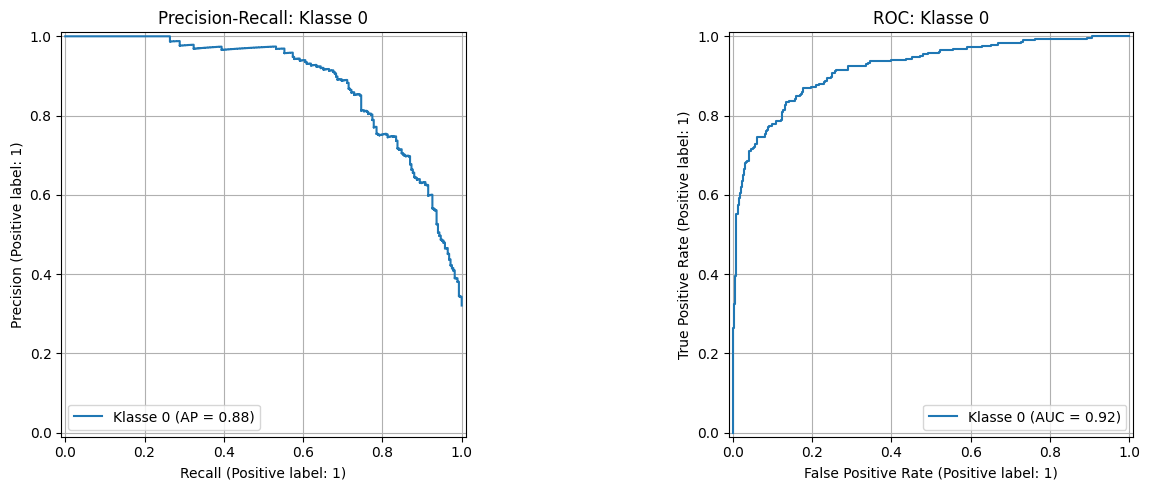

In [131]:
binary_targets = (validation_targets == 0).astype(int)
class_0_probabilities = hgb_predictions[:, 0]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

pr_display = PrecisionRecallDisplay.from_predictions(
    binary_targets, 
    class_0_probabilities,
    name='Klasse 0',
    ax=ax[0]
)
ax[0].set_title('Precision-Recall: Klasse 0')
ax[0].grid(True)

roc_display = RocCurveDisplay.from_predictions(
    binary_targets,
    class_0_probabilities,
    name='Klasse 0',
    ax=ax[1]
)
ax[1].set_title('ROC: Klasse 0')
ax[1].grid(True)

plt.tight_layout()
plt.show()

Precision-Recall kurven og utskriften av metrikker for ulike thresholds viser at klasse 0 vil ha 1 i precision og 0.21 i recall ved threshold satt til 0.97 på valideringsdata.

In [124]:
class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator, threshold=0.5, target_class=0): 
        self.estimator = estimator
        self.threshold = threshold
        self.target_class = target_class

    def fit(self, X, y):
        if not hasattr(self.estimator, 'classes_'):
            self.estimator.fit(X, y)
        self.classes_ = self.estimator.classes_
        return self

    def predict(self, X):
        proba = self.estimator.predict_proba(X)[:, self.target_class]
        binary_pred = (proba >= self.threshold).astype(int)
        
        if len(self.classes_) > 2:
            original_pred = self.estimator.predict(X)
            predictions = np.where(binary_pred == 1, self.target_class, original_pred)
            return predictions
        else:
            return binary_pred

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

Her opprettet jeg en klasse som lar meg velge threshold slik at jeg kan optimalisere det for en spesifikk klasse.

In [125]:
optimal_threshold = 0.97

hgb_optimized = ThresholdClassifier(
    estimator=best_hgb, 
    threshold=optimal_threshold, 
    target_class=0
)

hgb_optimized.fit(test_features, test_targets)

test_predictions = hgb_optimized.predict(test_features)

In [180]:
metrics_data = []

for class_label in [0, 1, 2]:
    precision = precision_score(test_targets, test_predictions, 
                                labels=[class_label], average=None, zero_division=0)[0]
    recall = recall_score(test_targets, test_predictions, 
                         labels=[class_label], average=None, zero_division=0)[0]
    f1 = f1_score(test_targets, test_predictions, 
                  labels=[class_label], average=None, zero_division=0)[0]
    
    support = (test_targets == class_label).sum()
    
    metrics_data.append({
        'Klasse': class_label,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Support': support
    })

metrics_df = pd.DataFrame(metrics_data)
print(f'\nMetrics for hver klasse (threshold={optimal_threshold:.3f}):\n')
print(metrics_df.round(3))


Metrics for hver klasse (threshold=0.970):

   Klasse  Precision  Recall  F1-score  Support
0       0      0.819   0.782     0.800      284
1       1      0.595   0.453     0.514      159
2       2      0.809   0.903     0.853      442


På testdata så oppnår jeg 0.82 precision, og 0.78 i recall for klasse 0

## Kilder
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html